### Initialization Packages

In [1]:
import pandas as pd
import numpy as np
import re 
import nltk
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics



from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

### Data load

In [2]:
Data_recipe_interaction = './Datasets/Recipes/RAW_interactions.csv'
Data_recipe = './Datasets/Recipes/RAW_recipes.csv'

In [43]:
recipe = pd.read_csv(Data_recipe)
recipe

name      id  minutes  \
0         arriba   baked winter squash mexican style  137739       55   
1                   a bit different  breakfast pizza   31490       30   
2                          all in the kitchen  chili  112140      130   
3                                 alouette  potatoes   59389       45   
4                 amish  tomato ketchup  for canning   44061      190   
...                                              ...     ...      ...   
231632                                   zydeco soup  486161       60   
231633                              zydeco spice mix  493372        5   
231634                     zydeco ya ya deviled eggs  308080       40   
231635        cookies by design   cookies on a stick  298512       29   
231636  cookies by design   sugar shortbread cookies  298509       20   

        contributor_id   submitted  \
0                47892  2005-09-16   
1                26278  2002-06-17   
2               196586  2005-02-25   
3                68585  2003-04-14   
4                41706  2002-10-25   
...                ...         ...   
231632          227978  2012-08-29   
231633         1500678  2013-01-09   
231634           37779  2008-06-07   
231635          506822  2008-04-15   
231636          506822  2008-04-15   

                                                     tags  \
0       ['60-minutes-or-less', 'time-to-make', 'course...   
1       ['30-minutes-or-less', 'time-to-make', 'course...   
2       ['time-to-make', 'course', 'preparation', 'mai...   
3       ['60-minutes-or-less', 'time-to-make', 'course...   
4       ['weeknight', 'time-to-make', 'course', 'main-...   
...                                                   ...   
231632  ['ham', '60-minutes-or-less', 'time-to-make', ...   
231633  ['15-minutes-or-less', 'time-to-make', 'course...   
231634  ['60-minutes-or-less', 'time-to-make', 'course...   
231635  ['30-minutes-or-less', 'time-to-make', 'course...   
231636  ['30-minutes-or-less', 'time-to-make', 'course...   

                                          nutrition  n_steps  \
0             [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1         [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2        [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3         [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4         [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   
...                                             ...      ...   
231632  [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]        7   
231633        [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]        1   
231634         [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7   
231635    [188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]        9   
231636     [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5   

                                                    steps  \
0       ['make a choice and proceed with recipe', 'dep...   
1       ['preheat oven to 425 degrees f', 'press dough...   
2       ['brown ground beef in large pot', 'add choppe...   
3       ['place potatoes in a large pot of lightly sal...   
4       ['mix all ingredients& boil for 2 1 / 2 hours ...   
...                                                   ...   
231632  ['heat oil in a 4-quart dutch oven', 'add cele...   
231633        ['mix all ingredients together thoroughly']   
231634  ['in a bowl , combine the mashed yolks and may...   
231635  ['place melted butter in a large mixing bowl a...   
231636  ['whip sugar and shortening in a large bowl , ...   

                                              description  \
0       autumn is my favorite time of year to cook! th...   
1       this recipe calls for the crust to be prebaked...   
2       this modified version of 'mom's' chili was a h...   
3       this is a super easy, great tasting, make ahea...   
4       my dh's amish mother raised him on this recipe...   
...                                                   ...   
231632  this is a delicious soup that i originally f

In [3]:
Recipe_interact = pd.read_csv(Data_recipe_interaction)
Recipe_interact

user_id  recipe_id        date  rating  \
0             38094      40893  2003-02-17       4   
1           1293707      40893  2011-12-21       5   
2              8937      44394  2002-12-01       4   
3            126440      85009  2010-02-27       5   
4             57222      85009  2011-10-01       5   
...             ...        ...         ...     ...   
1132362      116593      72730  2003-12-09       0   
1132363      583662     386618  2009-09-29       5   
1132364      157126      78003  2008-06-23       5   
1132365       53932      78003  2009-01-11       4   
1132366  2001868099      78003  2017-12-18       5   

                                                    review  
0        Great with a salad. Cooked on top of stove for...  
1        So simple, so delicious! Great for chilly fall...  
2        This worked very well and is EASY.  I used not...  
3        I made the Mexican topping and took it to bunk...  
4        Made the cheddar bacon topping, adding a sprin...  
...                                                    ...  
1132362  Another approach is to start making sauce with...  
1132363  These were so delicious!  My husband and I tru...  
1132364  WOW!  Sometimes I don't take the time to rate ...  
1132365  Very good!  I used regular port as well.  The ...  
1132366  I am so glad I googled and found this here. Th...  

[1132367 rows x 5 columns]

### At this stage I am considering the Recipe datasets as my projects. Initial thoughts: Set the target as predicting the rating of a recipe based on the various factors such as; user reviews, length of instructions, words used in recipes, ingredients used, estimated cooking time, nutrition details, number of ingredients. How each of these factors may affect the given rating of recipe and see if it can be used to predict what a given rating would be.

# Initial Data Inspection

In [5]:
recipe.head(1)

name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   

   contributor_id   submitted  \
0           47892  2005-09-16   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   

                               nutrition  n_steps  \
0  [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   

                                         ingredients  n_ingredients  
0  ['winter squash', 'mexican seasoning', 'mixed ...              7

Each column has unique data entries. Name: Name of recipe. ID: Unique Identity code for each recipe. Should be able to use this to join my two data sets together in a way. Minutes: How long it is estimated it will take a user to prepare each recipe. Contributor ID: I don't think this column will be of any use to me in my analysis. submitted: Date the recipe was uploaded to the site this was collected from, will be interesting to look at, but not likely to use in my analysis. Tags: Keywords used to classify recipes. Will be interesting to see what sort of correlation this can bring to my analysis. Nutrition: Not sure, but assuming caloric details about the recipes, should look further into this. N steps: Number of steps written in recipe, would like to see if this has any correlation to ratings of recipe. Steps: the steps as written in recipe. Would like to see if there are any key words used commonly amongst good and/or badly rated recipes. description: The story given with the recipe, may actually have an effect on the ratings, will have to see. Ingredients: The ingredients list for recipe, would like to know if the ratings can be affected by if a certain ingredient is used. N Ingredients: Number of ingredients used in recipe.

In [6]:
recipe.name.head(10)

0    arriba   baked winter squash mexican style
1              a bit different  breakfast pizza
2                     all in the kitchen  chili
3                            alouette  potatoes
4            amish  tomato ketchup  for canning
5                       apple a day  milk shake
6                         aww  marinated olives
7                backyard style  barbecued ribs
8                      bananas 4 ice cream  pie
9                       beat this  banana bread
Name: name, dtype: object

It's interesting to me that there is such a variety in length of each recipe name, some being 6 or 7 words long, others being only 2 words. Another interesting thing about this dataset is that some of the names have several spaces between some words. An example can be seen in even the first name, there are 3 spaces between arriba and baked. I might run two tests on this set, one where I leave it as it is, and another with these extra spaces cleaned up. I expect that this might give me different results.
Also; I like that it appears that all names are entered in lowercase, so I do not need to worry about that.
Oh, and it appears that these recipes have been entered into the data in alphabetical order, judging by the selection given up first.

In [7]:
recipe.id.sort_values()

126987        38
23695         39
22701         40
36412         41
22217         43
           ...  
13104     537459
1547      537485
137661    537543
145532    537671
136065    537716
Name: id, Length: 231637, dtype: int64

This on its own does not tell me very much about my data, all I can tell from this right now is that not all ID Values are represented. I.E. it is not every integer, the lowest value being 38, largest being 537716. But with values, such as 42, not being represented in the list.

In [8]:
recipe.minutes.sort_values()

191834             0
13373              0
95492              0
161771             0
156056             0
             ...    
106963        259205
38116         259260
106563        288000
109624       1051200
144074    2147483647
Name: minutes, Length: 231637, dtype: int64

This column clearly requires a bit of cleaning. Straight away I can be certain that there is no practical recipe that goes for 2147483647 MINUTES. (equivalent to over 4,000 years!) So will likely choose to restrict the data entries to recipes under 6 hours, or some other value that makes it practical. Or if there are not terribly many like this, I may go through and manually change these values.

In [9]:
recipe.iloc[144074]

name                                          no bake granola balls
id                                                           261647
minutes                                                  2147483647
contributor_id                                               464080
submitted                                                2007-10-26
tags              ['60-minutes-or-less', 'time-to-make', 'course...
nutrition               [330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]
n_steps                                                           9
steps             ['preheat the oven to 350 degrees', 'spread oa...
description       healthy snacks that kids (and grown ups) will ...
ingredients       ['rolled oats', 'unsweetened dried shredded co...
n_ingredients                                                     8
Name: 144074, dtype: object

This is clear that this should be a different time-stamp. It has a 60-minutes-or-less tag, so this is an example of something that can be clearly changed to a sensible minute stamp.

In [10]:
recipe.contributor_id.nunique()

27926

27926 separate id's for the 231637 recipes entered. Meaning that there are many repeat authors. This could be interesting to see if the author that submits the recipe can be an indicator for if it is a good recipe or not.

In [11]:
recipe.submitted.sort_values()

32272     1999-08-06
17770     1999-08-06
124       1999-08-06
52242     1999-08-06
95855     1999-08-06
             ...    
89909     2018-11-10
1547      2018-11-12
137661    2018-11-16
145532    2018-11-28
136065    2018-12-04
Name: submitted, Length: 231637, dtype: object

The earliest submission date was in 1999, so that's likely when the website was set up. Latest 2018, likely when this data was collected. This is listed as an object, so this can be changed to a Date-Time-Object

In [12]:
recipe.tags.head(10)

0    ['60-minutes-or-less', 'time-to-make', 'course...
1    ['30-minutes-or-less', 'time-to-make', 'course...
2    ['time-to-make', 'course', 'preparation', 'mai...
3    ['60-minutes-or-less', 'time-to-make', 'course...
4    ['weeknight', 'time-to-make', 'course', 'main-...
5    ['15-minutes-or-less', 'time-to-make', 'course...
6    ['15-minutes-or-less', 'time-to-make', 'course...
7    ['weeknight', 'time-to-make', 'course', 'main-...
8    ['weeknight', 'time-to-make', 'course', 'main-...
9    ['weeknight', 'time-to-make', 'course', 'main-...
Name: tags, dtype: object

In [13]:
recipe.tags[0]

"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']"

In [14]:
recipe.tags[1]

"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']"

In [15]:
recipe.tags[300]

"['time-to-make', 'course', 'cuisine', 'preparation', 'occasion', 'north-american', 'rolled-cookies', 'desserts', 'american', 'southern-united-states', 'easy', 'beginner-cook', 'kid-friendly', 'cookies-and-brownies', 'food-processor-blender', 'dietary', 'inexpensive', 'taste-mood', 'sweet', 'to-go', 'equipment', 'small-appliance', 'mixer', '4-hours-or-less']"

These tags will be interesting to do some NLP upon. See how many of these words are common amongst all recipes.

In [16]:
recipe.nutrition

0               [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]
1           [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]
2          [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]
3           [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]
4           [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]
                             ...                     
231632    [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]
231633          [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]
231634           [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]
231635      [188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]
231636       [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]
Name: nutrition, Length: 231637, dtype: object

### I should do some searching to find what each of these values represent.
Each list is assumed to be 7 long, each showing the value of a particular nutritional value.

In [17]:
recipe.n_steps.sort_values()

3381        0
217446      1
4085        1
126036      1
126074      1
         ... 
70088     100
1627      108
51532     110
51528     113
78633     145
Name: n_steps, Length: 231637, dtype: int64

Some of these recipes have unreasonable numbers for steps, it's not a recipe if it does not have any steps, and no one reasonably want to follow a recipe with 145 steps. These steps will need to be examined more closely.

In [18]:
recipe.steps.head(10)

0    ['make a choice and proceed with recipe', 'dep...
1    ['preheat oven to 425 degrees f', 'press dough...
2    ['brown ground beef in large pot', 'add choppe...
3    ['place potatoes in a large pot of lightly sal...
4    ['mix all ingredients& boil for 2 1 / 2 hours ...
5    ['combine ingredients in blender', 'cover and ...
6    ['toast the fennel seeds and lightly crush the...
7    ['in a medium saucepan combine all the ingredi...
8    ['crumble cookies into a 9-inch pie plate , or...
9    ['preheat oven to 350 degrees', 'butter two 9x...
Name: steps, dtype: object

In [19]:
recipe.steps[2]

"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']"

In [20]:
recipe.steps[3381]

'[]'

In [21]:
recipe.steps[78633]

"['white bread:', 'lightly spooning flour into measuring cup & leveling off , measure out 2 1 / 2 cups flour', 'combine flour , dry yeast , sugar , & salt in a large mixer bowl', 'blend', 'in a medium saucepan , combine water , milk , and oil', 'heat until very warm', 'add eggs and liquid to flour mixture', 'mixing - blend at low speed until moistened', 'beat 3 minutes at medium speed', 'with a wooden spoon , stir in an additional 3 to 3-1 / 2 cups of flour to form a sticky dough', 'in bowl or on a floured board , gradually work in 1 / 2 to 1-1 / 2 cups more flour , kneading or working in with hands until dough is smooth , pliable and no longer sticky', 'rising - place dough in a greased bowl', 'cover with a cloth or loose fit lid', 'let rise in a warm place until light and double in size , about 45 minutes', 'shaping & baking:punch down dough to remove air bubbles', 'divide dough into two parts', 'from dough into desired shapes', 'place in greased pans according to shaping and baking 

There are an array of variety amongst the steps length and word choices. This gives me the suggestion that the value of steps was calculated by separating by every comma. For an example of recipe 78633; It is recorded as 145 steps, where as the recipe is just heavy with commas, and not particularly step heavy. This will require some recalibration for steps it would seem.

In [22]:
recipe.description

0         autumn is my favorite time of year to cook! th...
1         this recipe calls for the crust to be prebaked...
2         this modified version of 'mom's' chili was a h...
3         this is a super easy, great tasting, make ahea...
4         my dh's amish mother raised him on this recipe...
                                ...                        
231632    this is a delicious soup that i originally fou...
231633      this spice mix will make your taste buds dance!
231634                            deviled eggs, cajun-style
231635    i've heard of the 'cookies by design' company,...
231636    i've heard of the 'cookies by design' company,...
Name: description, Length: 231637, dtype: object

In [23]:
recipe.description[231636]

"i've heard of the 'cookies by design' company, but have never tried their cookies. this is supposed to be a copy-cat of their sugar shortbread cookie."

In [24]:
recipe.description[231635]

"i've heard of the 'cookies by design' company, but have never tried their cookies. this recipe is supposed to be like theirs."

### It would seem that perhaps there are repeated recipes amongst this dataset, so I will have to go through and see if I can find these repeats. Perhaps I can use some Regex or NLP to find them

In [26]:
recipe.ingredients.head(10)

0    ['winter squash', 'mexican seasoning', 'mixed ...
1    ['prepared pizza crust', 'sausage patty', 'egg...
2    ['ground beef', 'yellow onions', 'diced tomato...
3    ['spreadable cheese with garlic and herbs', 'n...
4    ['tomato juice', 'apple cider vinegar', 'sugar...
5    ['milk', 'vanilla ice cream', 'frozen apple ju...
6    ['fennel seeds', 'green olives', 'ripe olives'...
7    ['pork spareribs', 'soy sauce', 'fresh garlic'...
8    ['chocolate sandwich style cookies', 'chocolat...
9    ['sugar', 'unsalted butter', 'bananas', 'eggs'...
Name: ingredients, dtype: object

In [27]:
recipe.ingredients[4]

"['tomato juice', 'apple cider vinegar', 'sugar', 'salt', 'pepper', 'clove oil', 'cinnamon oil', 'dry mustard']"

In [28]:
recipe.ingredients[160]

"['ground beef', 'eggs', 'cracker', 'thousand island dressing', 'pickle', 'onion', 'salt and pepper', 'cheddar cheese']"

In [30]:
recipe.n_ingredients.sort_values()

227680     1
133374     1
13958      1
133565     1
55087      1
          ..
18352     38
116744    39
230245    40
139659    40
2162      43
Name: n_ingredients, Length: 231637, dtype: int64

In [31]:
recipe.ingredients[13958]

"['corn']"

In [33]:
recipe.iloc[13958]

name                                          baked corn on the cob
id                                                           434212
minutes                                                          35
contributor_id                                               542159
submitted                                                2010-08-04
tags              ['60-minutes-or-less', 'time-to-make', 'main-i...
nutrition                    [113.3, 2.0, 21.0, 0.0, 8.0, 1.0, 8.0]
n_steps                                                           2
steps             ['in an oven heated at 350 f , cook corn in hu...
description       one of my neighbors was telling me this is her...
ingredients                                                ['corn']
n_ingredients                                                     1
Name: 13958, dtype: object

# Time to start cleaning the data

In [7]:
recipe.isna().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

Okay, so this is interesting. There are nearly 5000 entries in description that are missing values. Probably going to drop these.

In [44]:
recipe.dropna(inplace=True)
recipe.shape

(226657, 12)

In [46]:
# recipe.drop_duplicates()

There are no duplicates to be dropped this way, but maybe if I specify certain columns?

In [47]:
# recipe.name.drop_duplicates()

0           arriba   baked winter squash mexican style
1                     a bit different  breakfast pizza
2                            all in the kitchen  chili
3                                   alouette  potatoes
4                   amish  tomato ketchup  for canning
                              ...                     
231632                                     zydeco soup
231633                                zydeco spice mix
231634                       zydeco ya ya deviled eggs
231635          cookies by design   cookies on a stick
231636    cookies by design   sugar shortbread cookies
Name: name, Length: 225291, dtype: object

There are duplicates found this way. I think I will use this to do my eliminations of duplicates.

In [48]:
recipe.name.drop_duplicates(inplace=True)

In [12]:
recipe

name      id  minutes  \
0         arriba   baked winter squash mexican style  137739       55   
1                   a bit different  breakfast pizza   31490       30   
2                          all in the kitchen  chili  112140      130   
3                                 alouette  potatoes   59389       45   
4                 amish  tomato ketchup  for canning   44061      190   
...                                              ...     ...      ...   
231632                                   zydeco soup  486161       60   
231633                              zydeco spice mix  493372        5   
231634                     zydeco ya ya deviled eggs  308080       40   
231635        cookies by design   cookies on a stick  298512       29   
231636  cookies by design   sugar shortbread cookies  298509       20   

        contributor_id   submitted  \
0                47892  2005-09-16   
1                26278  2002-06-17   
2               196586  2005-02-25   
3                68585  2003-04-14   
4                41706  2002-10-25   
...                ...         ...   
231632          227978  2012-08-29   
231633         1500678  2013-01-09   
231634           37779  2008-06-07   
231635          506822  2008-04-15   
231636          506822  2008-04-15   

                                                     tags  \
0       ['60-minutes-or-less', 'time-to-make', 'course...   
1       ['30-minutes-or-less', 'time-to-make', 'course...   
2       ['time-to-make', 'course', 'preparation', 'mai...   
3       ['60-minutes-or-less', 'time-to-make', 'course...   
4       ['weeknight', 'time-to-make', 'course', 'main-...   
...                                                   ...   
231632  ['ham', '60-minutes-or-less', 'time-to-make', ...   
231633  ['15-minutes-or-less', 'time-to-make', 'course...   
231634  ['60-minutes-or-less', 'time-to-make', 'course...   
231635  ['30-minutes-or-less', 'time-to-make', 'course...   
231636  ['30-minutes-or-less', 'time-to-make', 'course...   

                                          nutrition  n_steps  \
0             [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1         [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2        [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3         [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4         [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   
...                                             ...      ...   
231632  [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]        7   
231633        [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]        1   
231634         [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7   
231635    [188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]        9   
231636     [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5   

                                                    steps  \
0       ['make a choice and proceed with recipe', 'dep...   
1       ['preheat oven to 425 degrees f', 'press dough...   
2       ['brown ground beef in large pot', 'add choppe...   
3       ['place potatoes in a large pot of lightly sal...   
4       ['mix all ingredients& boil for 2 1 / 2 hours ...   
...                                                   ...   
231632  ['heat oil in a 4-quart dutch oven', 'add cele...   
231633        ['mix all ingredients together thoroughly']   
231634  ['in a bowl , combine the mashed yolks and may...   
231635  ['place melted butter in a large mixing bowl a...   
231636  ['whip sugar and shortening in a large bowl , ...   

                                              description  \
0       autumn is my favorite time of year to cook! th...   
1       this recipe calls for the crust to be prebaked...   
2       this modified version of 'mom's' chili was a h...   
3       this is a super easy, great tasting, make ahea...   
4       my dh's amish mother raised him on this recipe...   
...                                                   ...   
231632  this is a delicious soup that i originally f

## Now to try and tackle the minutes column
Do I transform it to a Date:Time column?
Or not bother, seeing as it won't be done as over time analysis.

In [49]:
zero = recipe.loc[recipe['minutes'] == 0]
zero

name     id  minutes  \
3079                            albanian byrek   4880        0   
3440                 all in one tuna casserole   7009        0   
5153                               an mochi  1  43301        0   
5266    andouille in comforting barbecue sauce   6511        0   
5725                        another bean salad   7590        0   
...                                        ...    ...      ...   
227671                              wine jelly   3752        0   
229022                        yankee bean soup   3617        0   
230372              zesty beef and bean wedges   2681        0   
230761                      zippy tomato sauce   8035        0   
231325       zucchini potato and parmesan soup  29783        0   

        contributor_id   submitted  \
3079              1534  1999-11-24   
3440             35526  2000-03-06   
5153             32020  2002-10-16   
5266             47510  2000-03-06   
5725             39547  2000-03-13   
...                ...         ...   
227671            1535  1999-10-30   
229022            1646  1999-09-26   
230372            1552  1999-09-10   
230761           56112  2000-03-13   
231325           25045  2002-05-30   

                                                     tags  \
3079    ['15-minutes-or-less', 'time-to-make', 'course...   
3440    ['15-minutes-or-less', 'time-to-make', 'course...   
5153    ['15-minutes-or-less', 'time-to-make', 'course...   
5266    ['weeknight', '15-minutes-or-less', 'time-to-m...   
5725    ['15-minutes-or-less', 'time-to-make', 'course...   
...                                                   ...   
227671  ['15-minutes-or-less', 'time-to-make', 'course...   
229022  ['15-minutes-or-less', 'time-to-make', 'course...   
230372  ['15-minutes-or-less', 'time-to-make', 'main-i...   
230761  ['15-minutes-or-less', 'time-to-make', 'course...   
231325  ['15-minutes-or-less', 'time-to-make', 'course...   

                                              nutrition  n_steps  \
3079         [354.4, 42.0, 25.0, 59.0, 37.0, 37.0, 2.0]       14   
3440        [551.2, 33.0, 12.0, 46.0, 63.0, 51.0, 18.0]        5   
5153        [1543.6, 6.0, 401.0, 0.0, 37.0, 6.0, 117.0]       11   
5266           [180.8, 21.0, 6.0, 25.0, 7.0, 16.0, 1.0]       12   
5725            [160.5, 0.0, 89.0, 5.0, 9.0, 0.0, 11.0]        4   
...                                                 ...      ...   
227671      [3051.8, 0.0, 2807.0, 1.0, 0.0, 0.0, 237.0]       13   
229022  [2868.3, 13.0, 315.0, 20.0, 294.0, 10.0, 193.0]        4   
230372         [290.9, 34.0, 0.0, 3.0, 39.0, 43.0, 0.0]        9   
230761           [73.8, 4.0, 21.0, 27.0, 2.0, 3.0, 3.0]        5   
231325         [208.7, 9.0, 53.0, 30.0, 26.0, 8.0, 8.0]        9   

                                                    steps  \
3079    ['prepare the dough with flour , 1 and a half ...   
3440    ['preheat oven to 350 degrees f', 'in large bo...   
5153    ['boil water and sugar together', 'remove from...   
5266    ['saute onions , celery , bell pepper , and pa...   
5725    ['combine sugar , salt vinegar in pan , bring ...   
...                                                   ...   
227671  ['stir wine and sugar together , set aside for...   
229022  ['soak the beans according to label', 'add all...   
230372  ['heat oven to 375', 'combine beef , beans , m...   
230761  ['melt margarine in a small saucepan', 'add gr...   
231325  ['heat oil in a large pot over medium heat , a...   

                                              description  \
3079    the directions to this are vague, but maybe yo...   
3440    i recently adopted this recipe.  i made major ...   
5153    from hawai'i's best mochi recipe book that my ...   
5266    this is one of the zaar recipes that i adopted...   
5725                           a sweet, tangy bean salad.   
...                                                   ...   
227671  this make excellent gifts as it is quick and e...   
229022  this was give

430 data points with 0 minutes. I think it would be easiest to just drop these.

In [50]:
recipe.drop(index = zero.index, inplace=True)

In [51]:
six_hours = recipe.loc[recipe['minutes'] >= 360]
six_hours

name      id  minutes  contributor_id  \
11          better than sex  strawberries   42198     1460           41531   
12        better then bush s  baked beans   67547     2970           85627   
13             boat house  collard greens  107517      525          137696   
15       chicken lickin  good  pork chops   63986      500           14664   
27                  forgotten  minestrone   47366      495           31871   
...                                   ...     ...      ...             ...   
230913         zucchini and cheese damper  283151     1505          422893   
231185          zucchini gumbo  crock pot  336987      504           39835   
231355             zucchini salsa  canned  462992     2900         1403860   
231549  zucchini sausage brunch casserole  181958      540           89831   
231573          zuni caf zucchini pickles  316950     2895           62264   

         submitted                                               tags  \
11      2002-10-03  ['weeknight', 'time-to-make', 'course', 'main-...   
12      2003-07-26  ['weeknight', 'time-to-make', 'course', 'main-...   
13      2005-01-03  ['time-to-make', 'main-ingredient', 'preparati...   
15      2003-06-06  ['weeknight', 'time-to-make', 'course', 'main-...   
27      2002-11-21  ['weeknight', 'time-to-make', 'course', 'main-...   
...            ...                                                ...   
230913  2008-01-31  ['time-to-make', 'course', 'main-ingredient', ...   
231185  2008-11-13  ['course', 'preparation', 'gumbo', 'main-dish'...   
231355  2011-08-24  ['time-to-make', 'course', 'main-ingredient', ...   
231549  2006-08-15  ['time-to-make', 'course', 'main-ingredient', ...   
231573  2008-07-31  ['time-to-make', 'course', 'main-ingredient', ...   

                                            nutrition  n_steps  \
11      [734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0]        8   
12       [462.4, 28.0, 214.0, 69.0, 14.0, 29.0, 23.0]        9   
13           [315.8, 0.0, 202.0, 9.0, 6.0, 0.0, 21.0]        7   
15             [105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]        5   
27        [346.9, 24.0, 18.0, 42.0, 42.0, 30.0, 10.0]        5   
...                                               ...      ...   
230913     [332.7, 13.0, 2.0, 48.0, 25.0, 25.0, 16.0]        7   
231185      [455.5, 6.0, 42.0, 15.0, 20.0, 3.0, 31.0]        7   
231355         [64.5, 0.0, 44.0, 53.0, 3.0, 0.0, 4.0]       27   
231549    [616.3, 73.0, 11.0, 70.0, 71.0, 113.0, 3.0]       15   
231573     [343.6, 2.0, 284.0, 194.0, 5.0, 0.0, 25.0]       13   

                                                    steps  \
11      ['crush vanilla wafers into fine crumbs and li...   
12      ['in a very large sauce pan cover the beans an...   
13      ['put prepared greens in large pot', 'add wate...   
15      ['dredge pork chops in mixture of flour , salt...   
27      ['in a slow cooker , combine the first nine in...   
...                                                   ...   
230913  ['sift flour , salt & pepper together', 'light...   
231185  ['in a large skillet over medium heat heat the...   
231355  ['day one: in a large bowl or stainless pan co...   
231549  ['grease a 13 x 9-inch baking dish', 'in a ski...   
231573  ['wash and trim the zucchini , then slice them...   

                                              description  \
11      simple but sexy. this was in my local newspape...   
12      i'd have to say that this is a labor of love d...   
13      my boss gave me this recipe several years ago....   
15      here's and old standby i enjoy from time to ti...   
27                               this recipe came from a    
...                                                   ...   
230913  it's that time of year again when zucchinis ar...   
231185  this soup/gumbo is good.instead of the usual o...   
231355  this is a delicious salsa recipe that my siste...   
231549  you can prepare this casserole the night befor...   
231573  refrigerator pickl

Deciding that I will also drop these recipes that are said to take more than 6 hours (360 minutes), this should make for easier comparison and limits to the variables in each recipe.

In [52]:
recipe.drop(index = six_hours.index, inplace=True)

In [17]:
recipe

name      id  minutes  \
0         arriba   baked winter squash mexican style  137739       55   
1                   a bit different  breakfast pizza   31490       30   
2                          all in the kitchen  chili  112140      130   
3                                 alouette  potatoes   59389       45   
4                 amish  tomato ketchup  for canning   44061      190   
...                                              ...     ...      ...   
231632                                   zydeco soup  486161       60   
231633                              zydeco spice mix  493372        5   
231634                     zydeco ya ya deviled eggs  308080       40   
231635        cookies by design   cookies on a stick  298512       29   
231636  cookies by design   sugar shortbread cookies  298509       20   

        contributor_id   submitted  \
0                47892  2005-09-16   
1                26278  2002-06-17   
2               196586  2005-02-25   
3                68585  2003-04-14   
4                41706  2002-10-25   
...                ...         ...   
231632          227978  2012-08-29   
231633         1500678  2013-01-09   
231634           37779  2008-06-07   
231635          506822  2008-04-15   
231636          506822  2008-04-15   

                                                     tags  \
0       ['60-minutes-or-less', 'time-to-make', 'course...   
1       ['30-minutes-or-less', 'time-to-make', 'course...   
2       ['time-to-make', 'course', 'preparation', 'mai...   
3       ['60-minutes-or-less', 'time-to-make', 'course...   
4       ['weeknight', 'time-to-make', 'course', 'main-...   
...                                                   ...   
231632  ['ham', '60-minutes-or-less', 'time-to-make', ...   
231633  ['15-minutes-or-less', 'time-to-make', 'course...   
231634  ['60-minutes-or-less', 'time-to-make', 'course...   
231635  ['30-minutes-or-less', 'time-to-make', 'course...   
231636  ['30-minutes-or-less', 'time-to-make', 'course...   

                                          nutrition  n_steps  \
0             [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1         [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2        [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3         [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4         [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   
...                                             ...      ...   
231632  [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]        7   
231633        [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]        1   
231634         [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7   
231635    [188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]        9   
231636     [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5   

                                                    steps  \
0       ['make a choice and proceed with recipe', 'dep...   
1       ['preheat oven to 425 degrees f', 'press dough...   
2       ['brown ground beef in large pot', 'add choppe...   
3       ['place potatoes in a large pot of lightly sal...   
4       ['mix all ingredients& boil for 2 1 / 2 hours ...   
...                                                   ...   
231632  ['heat oil in a 4-quart dutch oven', 'add cele...   
231633        ['mix all ingredients together thoroughly']   
231634  ['in a bowl , combine the mashed yolks and may...   
231635  ['place melted butter in a large mixing bowl a...   
231636  ['whip sugar and shortening in a large bowl , ...   

                                              description  \
0       autumn is my favorite time of year to cook! th...   
1       this recipe calls for the crust to be prebaked...   
2       this modified version of 'mom's' chili was a h...   
3       this is a super easy, great tasting, make ahea...   
4       my dh's amish mother raised him on this recipe...   
...                                                   ...   
231632  this is a delicious soup that i originally f

Okay, that will do for the minutes, another quick look at the submitted column:

In [19]:
recipe.submitted

0         2005-09-16
1         2002-06-17
2         2005-02-25
3         2003-04-14
4         2002-10-25
             ...    
231632    2012-08-29
231633    2013-01-09
231634    2008-06-07
231635    2008-04-15
231636    2008-04-15
Name: submitted, Length: 217535, dtype: object

I think I will change this to DateTime. So then if I do want to use it, I can.

In [53]:
recipe['submitted'] = pd.to_datetime(recipe.submitted)
recipe.submitted

0        2005-09-16
1        2002-06-17
2        2005-02-25
3        2003-04-14
4        2002-10-25
            ...    
231632   2012-08-29
231633   2013-01-09
231634   2008-06-07
231635   2008-04-15
231636   2008-04-15
Name: submitted, Length: 217535, dtype: datetime64[ns]

In [22]:
recipe.submitted.describe()

count                  217535
unique                   5056
top       2005-04-12 00:00:00
freq                      416
first     1999-08-06 00:00:00
last      2018-12-04 00:00:00
Name: submitted, dtype: object

Okay, that looks better. I can leave this for now and come back to it later.

In [26]:
recipe.tags.unique()

array(["['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']",
       "['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']",
       "['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']",
       ...,
       "['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'appetizers', 'eggs-dairy', 'easy', 'finger-food', 'eggs', 'presentation', 'served-cold', '3-steps-or-less']",
       "['30-minutes-or-less', 'time-to-make', 'course', 'preparation', 'for-large-g

Okay, so these are all lists of tags. I guess I should try to get a full list holding all the tags in one list. I can play with this for a bit, maybe dummy variables would work?
#### Dummy variables don't work, data is too large to generate it as dummy variables.

In [54]:
tags = recipe.tags
tags

0         ['60-minutes-or-less', 'time-to-make', 'course...
1         ['30-minutes-or-less', 'time-to-make', 'course...
2         ['time-to-make', 'course', 'preparation', 'mai...
3         ['60-minutes-or-less', 'time-to-make', 'course...
4         ['weeknight', 'time-to-make', 'course', 'main-...
                                ...                        
231632    ['ham', '60-minutes-or-less', 'time-to-make', ...
231633    ['15-minutes-or-less', 'time-to-make', 'course...
231634    ['60-minutes-or-less', 'time-to-make', 'course...
231635    ['30-minutes-or-less', 'time-to-make', 'course...
231636    ['30-minutes-or-less', 'time-to-make', 'course...
Name: tags, Length: 217535, dtype: object

In [40]:
# Hmm. It would seem that this is not a list, but rather a string. Let's see if we can prove that.
# Yep. It's a string, not a list. So how to convert these to a list first?
# Ah, string.split should be able to do it.

In [25]:
# This is close to what I want, but not quite there.
# I think there is another step I need... Ahhh, .strip!

# tags_listed = []
# for tag_list in tags:
#     li = list(tag_list.split(', '))
#     tags_listed.append(li)
# tags_listed

In [24]:
# This is pretty close to what I want, the only annoying thing is that there are the extra quotations inside.
# tags_listed = []
# for tag_list in tags:
#     li =(tag_list.strip("][").split(', '))
#     tags_listed.append(li)
# tags_listed 

In [55]:
# This does the same as above, but in one line. The strip is unnecessary.
tags_listed = [i[1 : -1].split(', ') for i in tags]
tags_listed

[["'60-minutes-or-less'",
  "'time-to-make'",
  "'course'",
  "'main-ingredient'",
  "'cuisine'",
  "'preparation'",
  "'occasion'",
  "'north-american'",
  "'side-dishes'",
  "'vegetables'",
  "'mexican'",
  "'easy'",
  "'fall'",
  "'holiday-event'",
  "'vegetarian'",
  "'winter'",
  "'dietary'",
  "'christmas'",
  "'seasonal'",
  "'squash'"],
 ["'30-minutes-or-less'",
  "'time-to-make'",
  "'course'",
  "'main-ingredient'",
  "'cuisine'",
  "'preparation'",
  "'occasion'",
  "'north-american'",
  "'breakfast'",
  "'main-dish'",
  "'pork'",
  "'american'",
  "'oven'",
  "'easy'",
  "'kid-friendly'",
  "'pizza'",
  "'dietary'",
  "'northeastern-united-states'",
  "'meat'",
  "'equipment'"],
 ["'time-to-make'",
  "'course'",
  "'preparation'",
  "'main-dish'",
  "'chili'",
  "'crock-pot-slow-cooker'",
  "'dietary'",
  "'equipment'",
  "'4-hours-or-less'"],
 ["'60-minutes-or-less'",
  "'time-to-make'",
  "'course'",
  "'main-ingredient'",
  "'preparation'",
  "'occasion'",
  "'side-dishe

Now let's see if I can get a list of the unique tags.

In [56]:
full_tag_list = []
for tag_list in tags_listed:
    for tag in tag_list:
        if tag in full_tag_list:
            pass
        else:
            full_tag_list.append(tag)
full_tag_list

["'60-minutes-or-less'",
 "'time-to-make'",
 "'course'",
 "'main-ingredient'",
 "'cuisine'",
 "'preparation'",
 "'occasion'",
 "'north-american'",
 "'side-dishes'",
 "'vegetables'",
 "'mexican'",
 "'easy'",
 "'fall'",
 "'holiday-event'",
 "'vegetarian'",
 "'winter'",
 "'dietary'",
 "'christmas'",
 "'seasonal'",
 "'squash'",
 "'30-minutes-or-less'",
 "'breakfast'",
 "'main-dish'",
 "'pork'",
 "'american'",
 "'oven'",
 "'kid-friendly'",
 "'pizza'",
 "'northeastern-united-states'",
 "'meat'",
 "'equipment'",
 "'chili'",
 "'crock-pot-slow-cooker'",
 "'4-hours-or-less'",
 "'eggs-dairy'",
 "'potatoes'",
 "'dinner-party'",
 "'easter'",
 "'cheese'",
 "'stove-top'",
 "'new-years'",
 "'thanksgiving'",
 "'independence-day'",
 "'st-patricks-day'",
 "'valentines-day'",
 "'inexpensive'",
 "'brunch'",
 "'superbowl'",
 "'presentation'",
 "'served-hot'",
 "'weeknight'",
 "'canning'",
 "'condiments-etc'",
 "'heirloom-historical'",
 "'amish-mennonite'",
 "'number-of-servings'",
 "'technique'",
 "'15-minu

In [57]:
tag_df = pd.DataFrame(full_tag_list)
tag_df

0
0                                 '60-minutes-or-less'
1                                       'time-to-make'
2                                             'course'
3                                    'main-ingredient'
4                                            'cuisine'
..                                                 ...
515  'Throw the ultimate fiesta with this sopaipill...
516                                   'main-dish-beef'
517                             'roast-beef-main-dish'
518                          'roast-beef-comfort-food'
519                                      'pasta-salad'

[520 rows x 1 columns]

Okay, so this tells me that there are 520 different tags across all recipes.
I should fix the original datasets now too. I would also like to know how many of each tag across all recipes too.

In [58]:
recipe.tags = tags_listed

In [59]:
recipe.tags[1][1]

"'time-to-make'"

Okay, that's much better and can now be used for data analysis better

In [7]:
recipe.steps[0]

"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']"

Steps has the same issue as tags, but there is some other things that I want to do with this data first, so I might leave this as a string so I can do NLP with it.

In [60]:

def repl_func(x):
    pattern = r'[\[|\]|\']'
    b  = re.sub(pattern,'',x)
    c = re.sub(r',', ' ', b)
    return c

In [61]:
recipe.steps = recipe.steps.apply(repl_func)

In [26]:
recipe.steps

0         make a choice and proceed with recipe  dependi...
1         preheat oven to 425 degrees f  press dough int...
2         brown ground beef in large pot  add chopped on...
3         place potatoes in a large pot of lightly salte...
4         mix all ingredients& boil for 2 1 / 2 hours   ...
                                ...                        
231632    heat oil in a 4-quart dutch oven  add celery  ...
231633              mix all ingredients together thoroughly
231634    in a bowl   combine the mashed yolks and mayon...
231635    place melted butter in a large mixing bowl and...
231636    whip sugar and shortening in a large bowl   ad...
Name: steps, Length: 217535, dtype: object

### I think that gets my steps ready for NLP

In [23]:
# Now for another list working.
recipe.ingredients

0         ['winter squash', 'mexican seasoning', 'mixed ...
1         ['prepared pizza crust', 'sausage patty', 'egg...
2         ['ground beef', 'yellow onions', 'diced tomato...
3         ['spreadable cheese with garlic and herbs', 'n...
4         ['tomato juice', 'apple cider vinegar', 'sugar...
                                ...                        
231632    ['celery', 'onion', 'green sweet pepper', 'gar...
231633    ['paprika', 'salt', 'garlic powder', 'onion po...
231634    ['hard-cooked eggs', 'mayonnaise', 'dijon must...
231635    ['butter', 'eagle brand condensed milk', 'ligh...
231636    ['granulated sugar', 'shortening', 'eggs', 'fl...
Name: ingredients, Length: 217535, dtype: object

In [62]:
recipe.ingredients = [i[1 : -1].split(', ') for i in recipe.ingredients]


In [30]:
recipe.ingredients[0][0]

"'winter squash'"

In [63]:
full_ingredients_list = []
for ingredient_list in recipe.ingredients:
    for ingredient in ingredient_list:
        if ingredient in full_ingredients_list:
            pass
        else:
            full_ingredients_list.append(ingredient)
full_ingredients_list

["'winter squash'",
 "'mexican seasoning'",
 "'mixed spice'",
 "'honey'",
 "'butter'",
 "'olive oil'",
 "'salt'",
 "'prepared pizza crust'",
 "'sausage patty'",
 "'eggs'",
 "'milk'",
 "'salt and pepper'",
 "'cheese'",
 "'ground beef'",
 "'yellow onions'",
 "'diced tomatoes'",
 "'tomato paste'",
 "'tomato soup'",
 "'rotel tomatoes'",
 "'kidney beans'",
 "'water'",
 "'chili powder'",
 "'ground cumin'",
 "'lettuce'",
 "'cheddar cheese'",
 "'spreadable cheese with garlic and herbs'",
 "'new potatoes'",
 "'shallots'",
 "'parsley'",
 "'tarragon'",
 "'red wine vinegar'",
 "'pepper'",
 "'red bell pepper'",
 "'yellow bell pepper'",
 "'tomato juice'",
 "'apple cider vinegar'",
 "'sugar'",
 "'clove oil'",
 "'cinnamon oil'",
 "'dry mustard'",
 "'fennel seeds'",
 "'green olives'",
 "'ripe olives'",
 "'garlic'",
 "'peppercorn'",
 "'orange rind'",
 "'orange juice'",
 "'red chile'",
 "'extra virgin olive oil'",
 "'pork spareribs'",
 "'soy sauce'",
 "'fresh garlic'",
 "'fresh ginger'",
 "'fresh coarse 

In [64]:
ingredients_df = pd.DataFrame(full_ingredients_list)
ingredients_df

0
0                           'winter squash'
1                       'mexican seasoning'
2                             'mixed spice'
3                                   'honey'
4                                  'butter'
...                                     ...
14526                      'apricot jell-o'
14527  'rosarita premium whole black beans'
14528  "hunt's fire roasted diced tomatoes"
14529             'skinless halibut fillet'
14530                           'nepitella'

[14531 rows x 1 columns]

In [34]:
 recipe.n_steps.sort_values()

3381        0
22065       1
215527      1
145154      1
116413      1
         ... 
36413      90
220003     97
1627      108
51528     113
78633     145
Name: n_steps, Length: 217535, dtype: int64

I think for this iteration of learning I am going to drop this column. First, let me see how many are too big. Let's say too many steps is greater than 15.

In [65]:
too_many_steps = recipe.loc[recipe['n_steps'] >= 16]
too_many_steps

name      id  minutes  \
23                      deep fried dessert thingys  107699       20   
47                   jeanne s style  birthday cake   83025      230   
64      mr  grant you took half veal prince orloff   43164      120   
69             now and later  vegetarian empanadas   38276       90   
79                   real  italian bolognese sauce   83950      160   
...                                            ...     ...      ...   
231610            zurie s overnight no knead bread  196201       70   
231617        zwetschgenkuchen  bavarian plum cake  386977      240   
231621            zwieback toast  teething cookies  156724      100   
231622                 zwiebelbrotchen onion rolls  424875      210   
231627                zwiebelwhe  swiss onion tart  410985      165   

        contributor_id  submitted  \
23              158966 2005-01-05   
47              116315 2004-02-04   
64               28201 2002-10-14   
69               37640 2002-08-26   
79              124847 2004-02-14   
...                ...        ...   
231610          200862 2006-11-18   
231617          177443 2009-08-24   
231621          224921 2006-02-20   
231622          107135 2010-05-12   
231627          993604 2010-01-30   

                                                     tags  \
23      ['30-minutes-or-less', 'time-to-make', 'course...   
47      ['time-to-make', 'course', 'preparation', 'occ...   
64      ['weeknight', 'time-to-make', 'course', 'main-...   
69      ['weeknight', 'time-to-make', 'course', 'main-...   
79      ['time-to-make', 'course', 'cuisine', 'prepara...   
...                                                   ...   
231610  ['time-to-make', 'course', 'main-ingredient', ...   
231617  ['time-to-make', 'course', 'main-ingredient', ...   
231621  ['time-to-make', 'course', 'main-ingredient', ...   
231622  ['time-to-make', 'course', 'cuisine', 'prepara...   
231627  ['weeknight', 'time-to-make', 'course', 'main-...   

                                                nutrition  n_steps  \
23        [1663.3, 221.0, 168.0, 66.0, 19.0, 158.0, 29.0]       20   
47      [5467.4, 516.0, 1196.0, 135.0, 110.0, 615.0, 1...       25   
64             [510.6, 50.0, 10.0, 21.0, 90.0, 70.0, 1.0]       26   
69            [477.1, 36.0, 24.0, 21.0, 26.0, 61.0, 18.0]       41   
79         [1260.7, 97.0, 11.0, 71.0, 103.0, 119.0, 38.0]       16   
...                                                   ...      ...   
231610        [1379.6, 5.0, 12.0, 194.0, 79.0, 3.0, 96.0]       82   
231617        [561.3, 38.0, 122.0, 2.0, 16.0, 76.0, 25.0]       22   
231621               [56.2, 2.0, 4.0, 1.0, 2.0, 3.0, 3.0]       23   
231622              [157.9, 3.0, 7.0, 0.0, 8.0, 5.0, 9.0]       23   
231627         [440.1, 49.0, 15.0, 10.0, 22.0, 90.0, 9.0]       38   

                                                    steps  \
23      in a large bowl   mix flour   granulated sugar...   
47      to prepare base   cut shortening into dry ingr...   
64      preheat oven to 325  dry the veal on paper tow...   
69      in a pot   cover carrots with water to cover  ...   
79      in a dutch oven or medium size pot   heat butt...   
...                                                   ...   
231610  "since first making this bread according to th...   
231617  in a small bowl   combine the yeast and half o...   
231621  stir together 1 / 2 teaspoon of sugar   the ye...   
231622  saute onions in sesame oil until golden  proof...   
231627  crust:  pulse flour   baking powder   and salt...   

                                              description  \
23      my mother used to make this for us as a specia...   
47      a bakery in winnipeg is famous for this specia...   
64      i couldn't resist! named in honor of one of my...   
69                                          this is from    
79      after traveling throughout italy, savoring the...   
...                                                   ...   
231610  after 

If I take out all of these...

In [66]:
recipe.drop(index = too_many_steps.index)

name      id  minutes  \
0         arriba   baked winter squash mexican style  137739       55   
1                   a bit different  breakfast pizza   31490       30   
2                          all in the kitchen  chili  112140      130   
3                                 alouette  potatoes   59389       45   
4                 amish  tomato ketchup  for canning   44061      190   
...                                              ...     ...      ...   
231632                                   zydeco soup  486161       60   
231633                              zydeco spice mix  493372        5   
231634                     zydeco ya ya deviled eggs  308080       40   
231635        cookies by design   cookies on a stick  298512       29   
231636  cookies by design   sugar shortbread cookies  298509       20   

        contributor_id  submitted  \
0                47892 2005-09-16   
1                26278 2002-06-17   
2               196586 2005-02-25   
3                68585 2003-04-14   
4                41706 2002-10-25   
...                ...        ...   
231632          227978 2012-08-29   
231633         1500678 2013-01-09   
231634           37779 2008-06-07   
231635          506822 2008-04-15   
231636          506822 2008-04-15   

                                                     tags  \
0       ['60-minutes-or-less', 'time-to-make', 'course...   
1       ['30-minutes-or-less', 'time-to-make', 'course...   
2       ['time-to-make', 'course', 'preparation', 'mai...   
3       ['60-minutes-or-less', 'time-to-make', 'course...   
4       ['weeknight', 'time-to-make', 'course', 'main-...   
...                                                   ...   
231632  ['ham', '60-minutes-or-less', 'time-to-make', ...   
231633  ['15-minutes-or-less', 'time-to-make', 'course...   
231634  ['60-minutes-or-less', 'time-to-make', 'course...   
231635  ['30-minutes-or-less', 'time-to-make', 'course...   
231636  ['30-minutes-or-less', 'time-to-make', 'course...   

                                          nutrition  n_steps  \
0             [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1         [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2        [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3         [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4         [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   
...                                             ...      ...   
231632  [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]        7   
231633        [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]        1   
231634         [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7   
231635    [188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]        9   
231636     [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5   

                                                    steps  \
0       make a choice and proceed with recipe  dependi...   
1       preheat oven to 425 degrees f  press dough int...   
2       brown ground beef in large pot  add chopped on...   
3       place potatoes in a large pot of lightly salte...   
4       mix all ingredients& boil for 2 1 / 2 hours   ...   
...                                                   ...   
231632  heat oil in a 4-quart dutch oven  add celery  ...   
231633            mix all ingredients together thoroughly   
231634  in a bowl   combine the mashed yolks and mayon...   
231635  place melted butter in a large mixing bowl and...   
231636  whip sugar and shortening in a large bowl   ad...   

                                              description  \
0       autumn is my favorite time of year to cook! th...   
1       this recipe calls for the crust to be prebaked...   
2       this modified version of 'mom's' chili was a h...   
3       this is a super easy, great tasting, make ahea...   
4       my dh's amish mother raised him on this recipe...   
...                                                   ...   
231632  this is a delicious soup that i originally fou...   
231

I still have a large number of values, so for the sake of leaving it in so I can use the column for more accurate analysis (hopefully), I will go through with removing these large number of steps. In future, perhaps I could re-run the measurement for number of steps on those ones that are too many steps, but that would require more time/knowledge than what I have.

In [67]:
recipe.drop(index = too_many_steps.index, inplace=True)

In [68]:
# def name_func(x):
#     pattern = r'(  )*'
#     b  = re.sub(pattern,' ',x)
#     return b

In [71]:
# recipe.name

## Initial Data Cleaning Done!
I am aware I have only cleaned one of the two dataframes I have so far, not even really looking at the other one... So I guess I'll start looking at it now.

Let's save this cleaned data in to a new csv for later use.

In [72]:
recipe.to_csv('./Datasets/Recipes/Recipes_Cleaned.csv')

### Time to look at my other data set

In [4]:
Recipe_interact

user_id  recipe_id        date  rating  \
0             38094      40893  2003-02-17       4   
1           1293707      40893  2011-12-21       5   
2              8937      44394  2002-12-01       4   
3            126440      85009  2010-02-27       5   
4             57222      85009  2011-10-01       5   
...             ...        ...         ...     ...   
1132362      116593      72730  2003-12-09       0   
1132363      583662     386618  2009-09-29       5   
1132364      157126      78003  2008-06-23       5   
1132365       53932      78003  2009-01-11       4   
1132366  2001868099      78003  2017-12-18       5   

                                                    review  
0        Great with a salad. Cooked on top of stove for...  
1        So simple, so delicious! Great for chilly fall...  
2        This worked very well and is EASY.  I used not...  
3        I made the Mexican topping and took it to bunk...  
4        Made the cheddar bacon topping, adding a sprin...  
...                                                    ...  
1132362  Another approach is to start making sauce with...  
1132363  These were so delicious!  My husband and I tru...  
1132364  WOW!  Sometimes I don't take the time to rate ...  
1132365  Very good!  I used regular port as well.  The ...  
1132366  I am so glad I googled and found this here. Th...  

[1132367 rows x 5 columns]

In [5]:
Recipe_interact.rename(columns={'recipe_id':'id'},inplace=True)

In [6]:
Recipe_interact.describe()

user_id            id        rating
count  1.132367e+06  1.132367e+06  1.132367e+06
mean   1.384291e+08  1.608972e+05  4.411016e+00
std    5.014269e+08  1.303987e+05  1.264752e+00
min    1.533000e+03  3.800000e+01  0.000000e+00
25%    1.354700e+05  5.425700e+04  4.000000e+00
50%    3.309370e+05  1.205470e+05  5.000000e+00
75%    8.045500e+05  2.438520e+05  5.000000e+00
max    2.002373e+09  5.377160e+05  5.000000e+00

Interestingly, rating has a mean of 4.4, and std of 1.3, so majority of ratings are above a score of 3.1. with a full score being 5. There ARE scores of zero, so they will be the important scores. Let's have a look there first. 

In [7]:
Recipe_interact.loc[Recipe_interact['rating'] == 0]

user_id      id        date  rating  \
6            124416  120345  2011-08-06       0   
12           468945  134728  2008-02-20       0   
23           681408  225241  2008-03-14       0   
39       2002068522   29093  2018-03-26       0   
56           980899   79222  2010-10-18       0   
...             ...     ...         ...     ...   
1132318     1197076  190261  2010-03-08       0   
1132323     2405600  290157  2014-11-10       0   
1132325  2000650711  290157  2017-04-10       0   
1132361      102526   54493  2007-04-26       0   
1132362      116593   72730  2003-12-09       0   

                                                    review  
6        Just an observation, so I will not rate.  I fo...  
12       Made my own buttermilk w/ vinegar and milk.  U...  
23       This is a very good recipe.  We also want to c...  
39                            i made it and it was amazing  
56       I used half cream and half 1% milk, added anot...  
...                                                    ...  
1132318  Delicious ! I tweeked the recipe a bit>>substi...  
1132323  Just added this mix to a homemade beef &amp; s...  
1132325  Would this make a good hamburger patty seasoning?  
1132361  I am not going to rate this because I did have...  
1132362  Another approach is to start making sauce with...  

[60847 rows x 5 columns]

Okay, good, there are still 60,000 rows that are 0 score reviews. I can use those.

In [8]:
Recipe_interact.loc[Recipe_interact['rating'] == 5]

user_id      id        date  rating  \
1           1293707   40893  2011-12-21       5   
3            126440   85009  2010-02-27       5   
4             57222   85009  2011-10-01       5   
9            273745  134728  2005-12-22       5   
10           353911  134728  2006-09-26       5   
...             ...     ...         ...     ...   
1132359  2001898209   82303  2018-07-05       5   
1132360  2002357020   82303  2018-12-05       5   
1132363      583662  386618  2009-09-29       5   
1132364      157126   78003  2008-06-23       5   
1132366  2001868099   78003  2017-12-18       5   

                                                    review  
1        So simple, so delicious! Great for chilly fall...  
3        I made the Mexican topping and took it to bunk...  
4        Made the cheddar bacon topping, adding a sprin...  
9                                   Better than the real!!  
10       Absolutely AWESOME! I was speechless when I tr...  
...                                                    ...  
1132359  This is the best and easiest hot fudge ever. I...  
1132360  Delicious quick thick chocolate sauce with ing...  
1132363  These were so delicious!  My husband and I tru...  
1132364  WOW!  Sometimes I don't take the time to rate ...  
1132366  I am so glad I googled and found this here. Th...  

[816364 rows x 5 columns]

Wow! But there 800,000 rows with a full 5 rating! Surely I will be able to use this to classify my data in a good way though.

### I am going to focus on defining just between the 5 star reviews, and 0 star reviews. This will hopefully make for more reliable and significant data analysis.

But these are all individual reviews, it is very possible that many of these are ratings for the same recipes. I should groupby recipe_id and do a rating mean.

In [9]:
wanted = Recipe_interact[['id','rating']]

In [10]:
wanted_grouped = wanted.groupby('id').mean()

In [11]:
wanted_grouped.loc[wanted_grouped['rating'] > 3]

rating
id              
38      4.250000
40      4.333333
41      4.500000
46      5.000000
49      4.350000
...          ...
537242  5.000000
537458  5.000000
537459  5.000000
537485  5.000000
537716  5.000000

[208391 rows x 1 columns]

In [12]:
wanted_grouped.loc[wanted_grouped['rating'] <= 3]

rating
id              
39      3.000000
43      1.000000
45      2.666667
48      1.000000
53      3.000000
...          ...
537331  1.000000
537351  0.000000
537429  0.000000
537543  0.000000
537671  0.000000

[23246 rows x 1 columns]

Okay, so change of definition for my classification of good or bad. There are not very many recipes that are truly zero for overall rating. So I will classify the recipe as 'bad' if it has a rating of 3 stars or less. Particularly as this is more than 1 std from the mean.

### I want to mark the ratings of 3 or less as a 0, and otherwise as 1. This will be my classification for prediction.

In [13]:
def good_bad_rating(x):
    if x > 3:
        a = 1
    else:
        a = 0
    return (a)

In [14]:
wanted_grouped['top_rating'] = wanted_grouped.rating.apply(good_bad_rating)

In [15]:
dfi = pd.read_csv('./Datasets/Recipes/Recipes_Cleaned.csv')

In [16]:
df = dfi.join(wanted_grouped,on=dfi['id'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188160 entries, 0 to 188159
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      188160 non-null  int64  
 1   name            188160 non-null  object 
 2   id              188160 non-null  int64  
 3   minutes         188160 non-null  int64  
 4   contributor_id  188160 non-null  int64  
 5   submitted       188160 non-null  object 
 6   tags            188160 non-null  object 
 7   nutrition       188160 non-null  object 
 8   n_steps         188160 non-null  int64  
 9   steps           188159 non-null  object 
 10  description     188160 non-null  object 
 11  ingredients     188160 non-null  object 
 12  n_ingredients   188160 non-null  int64  
 13  rating          188160 non-null  float64
 14  top_rating      188160 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 21.5+ MB


Huh. There's a null value in steps.

In [18]:
df.dropna(inplace=True)

In [19]:
df.drop(columns='Unnamed: 0',inplace=True)

In [20]:
df

name      id  minutes  \
0         arriba   baked winter squash mexican style  137739       55   
1                   a bit different  breakfast pizza   31490       30   
2                          all in the kitchen  chili  112140      130   
3                                 alouette  potatoes   59389       45   
4                 amish  tomato ketchup  for canning   44061      190   
...                                              ...     ...      ...   
188155                                   zydeco soup  486161       60   
188156                              zydeco spice mix  493372        5   
188157                     zydeco ya ya deviled eggs  308080       40   
188158        cookies by design   cookies on a stick  298512       29   
188159  cookies by design   sugar shortbread cookies  298509       20   

        contributor_id   submitted  \
0                47892  2005-09-16   
1                26278  2002-06-17   
2               196586  2005-02-25   
3                68585  2003-04-14   
4                41706  2002-10-25   
...                ...         ...   
188155          227978  2012-08-29   
188156         1500678  2013-01-09   
188157           37779  2008-06-07   
188158          506822  2008-04-15   
188159          506822  2008-04-15   

                                                     tags  \
0       ["'60-minutes-or-less'", "'time-to-make'", "'c...   
1       ["'30-minutes-or-less'", "'time-to-make'", "'c...   
2       ["'time-to-make'", "'course'", "'preparation'"...   
3       ["'60-minutes-or-less'", "'time-to-make'", "'c...   
4       ["'weeknight'", "'time-to-make'", "'course'", ...   
...                                                   ...   
188155  ["'ham'", "'60-minutes-or-less'", "'time-to-ma...   
188156  ["'15-minutes-or-less'", "'time-to-make'", "'c...   
188157  ["'60-minutes-or-less'", "'time-to-make'", "'c...   
188158  ["'30-minutes-or-less'", "'time-to-make'", "'c...   
188159  ["'30-minutes-or-less'", "'time-to-make'", "'c...   

                                          nutrition  n_steps  \
0             [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1         [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2        [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3         [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4         [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   
...                                             ...      ...   
188155  [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]        7   
188156        [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]        1   
188157         [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7   
188158    [188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]        9   
188159     [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5   

                                                    steps  \
0       make a choice and proceed with recipe  dependi...   
1       preheat oven to 425 degrees f  press dough int...   
2       brown ground beef in large pot  add chopped on...   
3       place potatoes in a large pot of lightly salte...   
4       mix all ingredients& boil for 2 1 / 2 hours   ...   
...                                                   ...   
188155  heat oil in a 4-quart dutch oven  add celery  ...   
188156            mix all ingredients together thoroughly   
188157  in a bowl   combine the mashed yolks and mayon...   
188158  place melted butter in a large mixing bowl and...   
188159  whip sugar and shortening in a large bowl   ad...   

                                              description  \
0       autumn is my favorite time of year to cook! th...   
1       this recipe calls for the crust to be prebaked...   
2       this modified version of 'mom's' chili was a h...   
3       this is a super easy, great tasting, make ahea...   
4       my dh's amish mother raised him on this recipe...   
...                                                   ...   
188155  this is a delicious soup that i originally f

In [23]:
# Save this dataset so that I have quick restart on it.
df.to_csv('./Datasets/Recipes/Final_Data.csv')

In [2]:
df = pd.read_csv('./Datasets/Recipes/Final_Data.csv')

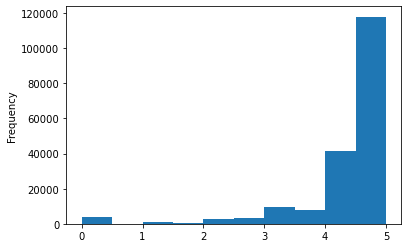

In [3]:
df.rating.plot(kind = 'hist')

In [4]:
df.top_rating.median()

1.0

In [5]:
df.top_rating.mean()

0.9039163686031495

### This also doubles as my Baseline Prediction

In [6]:
df.top_rating.value_counts()

1    170080
0     18079
Name: top_rating, dtype: int64

Text(0.5, 0.98, 'Categorical Plotting')

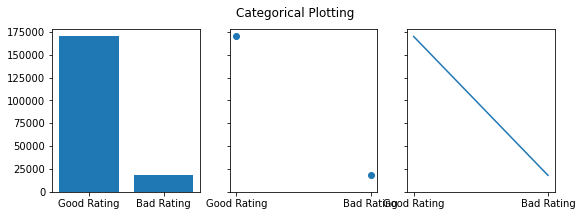

In [17]:
data = {'Good Rating':170080,'Bad Rating':18079}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

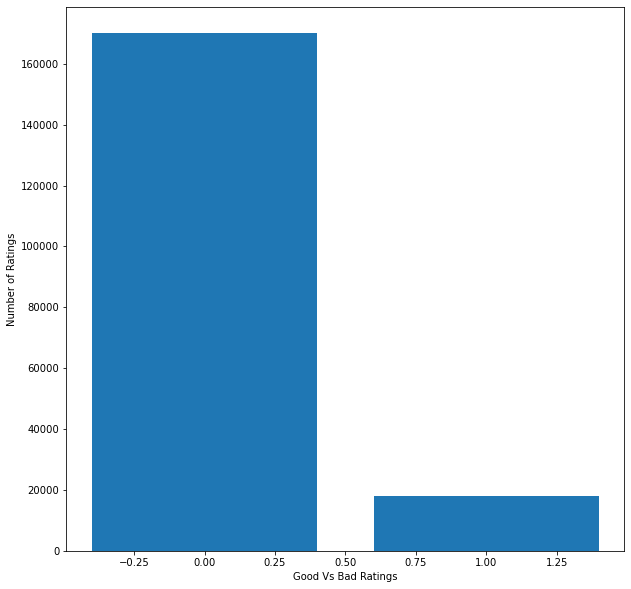

In [16]:
fig = plt.figure(figsize=(10,10))
plt.xlabel('Good Vs Bad Ratings')
plt.ylabel('Number of Ratings')
plt.bar([0,1],df.top_rating.value_counts())
plt.show()

Hmm. Looking at this, I don't have much in the way of negative ratings. Maybe I can change my scores more? But I will see what sort of results I get with this.
So that currently it is 9 out of 10 have good ratings.

In [8]:
df.steps[0]

'make a choice and proceed with recipe  depending on size of squash   cut into half or fourths  remove seeds  for spicy squash   drizzle olive oil or melted butter over each cut squash piece  season with mexican seasoning mix ii  for sweet squash   drizzle melted honey   butter   grated piloncillo over each cut squash piece  season with sweet mexican spice mix  bake at 350 degrees   again depending on size   for 40 minutes up to an hour   until a fork can easily pierce the skin  be careful not to burn the squash especially if you opt to use sugar or butter  if you feel more comfortable   cover the squash with aluminum foil the first half hour   give or take   of baking  if desired   season with salt'

In [9]:
tokens = nltk.word_tokenize(df.steps[0])
tokens

['make',
 'a',
 'choice',
 'and',
 'proceed',
 'with',
 'recipe',
 'depending',
 'on',
 'size',
 'of',
 'squash',
 'cut',
 'into',
 'half',
 'or',
 'fourths',
 'remove',
 'seeds',
 'for',
 'spicy',
 'squash',
 'drizzle',
 'olive',
 'oil',
 'or',
 'melted',
 'butter',
 'over',
 'each',
 'cut',
 'squash',
 'piece',
 'season',
 'with',
 'mexican',
 'seasoning',
 'mix',
 'ii',
 'for',
 'sweet',
 'squash',
 'drizzle',
 'melted',
 'honey',
 'butter',
 'grated',
 'piloncillo',
 'over',
 'each',
 'cut',
 'squash',
 'piece',
 'season',
 'with',
 'sweet',
 'mexican',
 'spice',
 'mix',
 'bake',
 'at',
 '350',
 'degrees',
 'again',
 'depending',
 'on',
 'size',
 'for',
 '40',
 'minutes',
 'up',
 'to',
 'an',
 'hour',
 'until',
 'a',
 'fork',
 'can',
 'easily',
 'pierce',
 'the',
 'skin',
 'be',
 'careful',
 'not',
 'to',
 'burn',
 'the',
 'squash',
 'especially',
 'if',
 'you',
 'opt',
 'to',
 'use',
 'sugar',
 'or',
 'butter',
 'if',
 'you',
 'feel',
 'more',
 'comfortable',
 'cover',
 'the',
 's

In [3]:
tokenized_steps = []

for steps in df.steps:
    tokens = nltk.word_tokenize(steps)
    tokenized_steps.append(tokens)

tokenized_steps

[['make',
  'a',
  'choice',
  'and',
  'proceed',
  'with',
  'recipe',
  'depending',
  'on',
  'size',
  'of',
  'squash',
  'cut',
  'into',
  'half',
  'or',
  'fourths',
  'remove',
  'seeds',
  'for',
  'spicy',
  'squash',
  'drizzle',
  'olive',
  'oil',
  'or',
  'melted',
  'butter',
  'over',
  'each',
  'cut',
  'squash',
  'piece',
  'season',
  'with',
  'mexican',
  'seasoning',
  'mix',
  'ii',
  'for',
  'sweet',
  'squash',
  'drizzle',
  'melted',
  'honey',
  'butter',
  'grated',
  'piloncillo',
  'over',
  'each',
  'cut',
  'squash',
  'piece',
  'season',
  'with',
  'sweet',
  'mexican',
  'spice',
  'mix',
  'bake',
  'at',
  '350',
  'degrees',
  'again',
  'depending',
  'on',
  'size',
  'for',
  '40',
  'minutes',
  'up',
  'to',
  'an',
  'hour',
  'until',
  'a',
  'fork',
  'can',
  'easily',
  'pierce',
  'the',
  'skin',
  'be',
  'careful',
  'not',
  'to',
  'burn',
  'the',
  'squash',
  'especially',
  'if',
  'you',
  'opt',
  'to',
  'use',
  '

In [8]:
def Tokenizing(data):
    tokenized_steps = []
    for token_set in data:
        tokens = nltk.word_tokenize(token_set)
        tokenized_steps.append(tokens)
    return(tokenized_steps)

In [9]:
df['tokenized_names'] = Tokenizing(df.name)
df['tokenized_tags'] = Tokenizing(df.tags)
df['tokenized_description'] = Tokenizing(df.description)
df['tokenized_ingredients'] = Tokenizing(df.ingredients)

In [4]:
df['tokenized_steps']=tokenized_steps

In [5]:
all_words = [word for tokens in df['tokenized_steps'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df['tokenized_steps']]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s"% (len(all_words), len(VOCAB)))

print("Max sentence length is %s" % max(sentence_lengths))

14865570 words total, with a vocabulary size of 43977
Max sentence length is 507


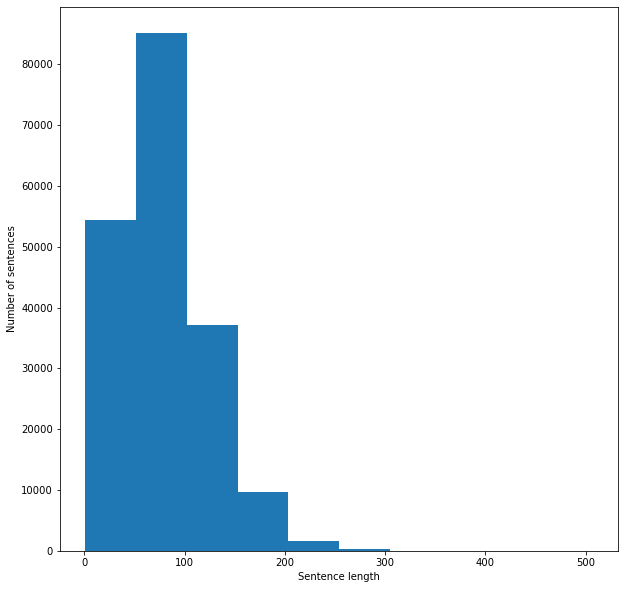

In [6]:
fig = plt.figure(figsize=(10,10))
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [11]:
def Token_analysis(df_tokens):
    all_words = [word for tokens in df_tokens for word in tokens]
    sentence_lengths = [len(tokens) for tokens in df_tokens]
    VOCAB = sorted(list(set(all_words)))
    print("%s words total, with a vocabulary size of %s"% (len(all_words), len(VOCAB)))

    print("Max sentence length is %s" % max(sentence_lengths))
    
    fig = plt.figure(figsize=(10,10))
    plt.xlabel('Sentence length')
    plt.ylabel('Number of sentences')
    plt.hist(sentence_lengths)
    plt.show()
    return()

807853 words total, with a vocabulary size of 25211
Max sentence length is 15


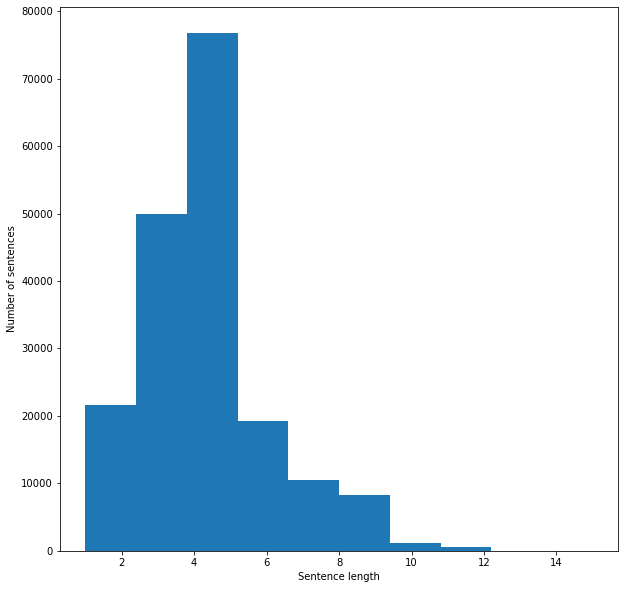

17229984 words total, with a vocabulary size of 529
Max sentence length is 367


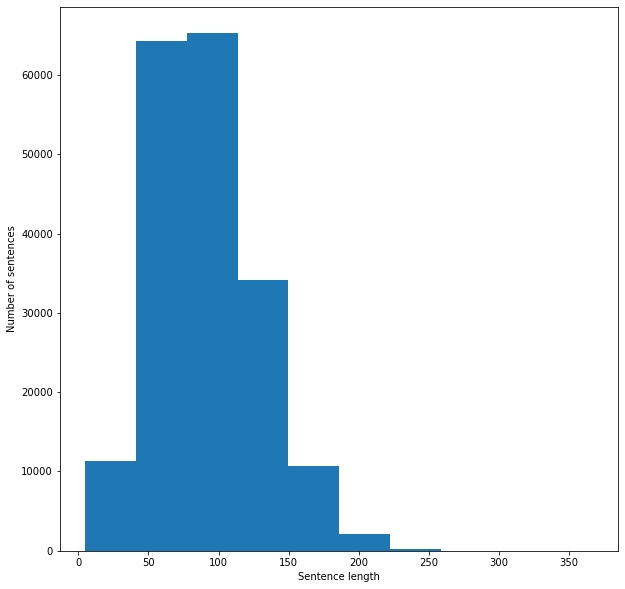

7512629 words total, with a vocabulary size of 82270
Max sentence length is 1327


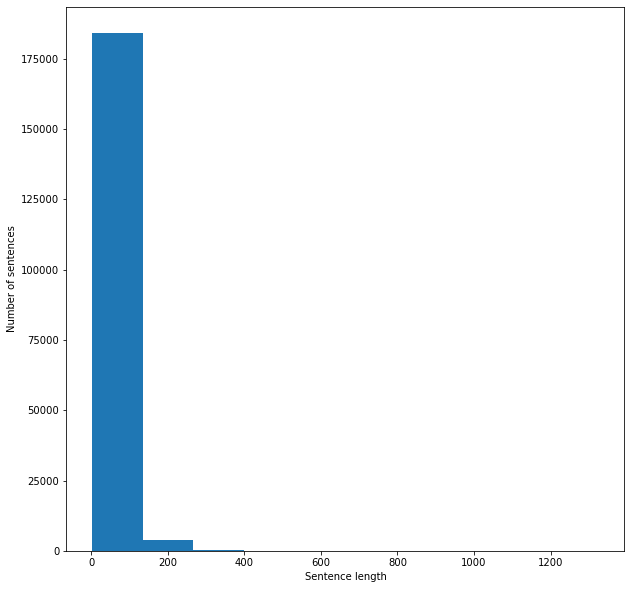

9613623 words total, with a vocabulary size of 5717
Max sentence length is 231


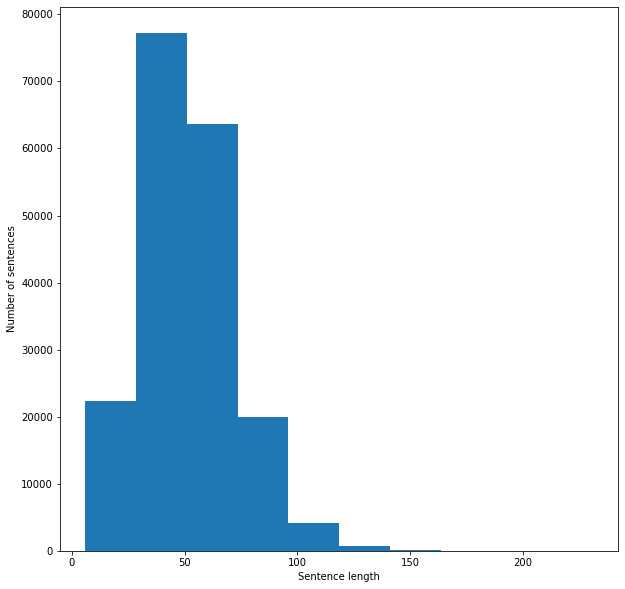

14865570 words total, with a vocabulary size of 43977
Max sentence length is 507


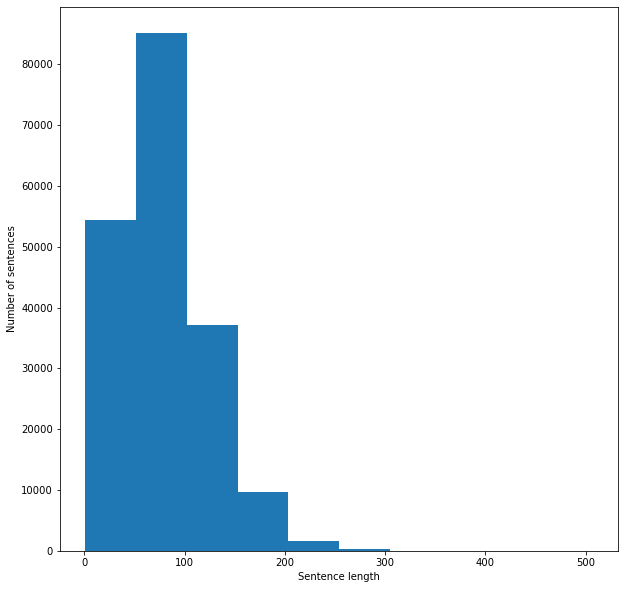

()

In [26]:
Token_analysis(df['tokenized_names'])
Token_analysis(df['tokenized_tags'])
Token_analysis(df['tokenized_description'])
Token_analysis(df['tokenized_ingredients'])
Token_analysis(df['tokenized_steps'])

807853 words total, with a vocabulary size of 25211
Max sentence length is 15


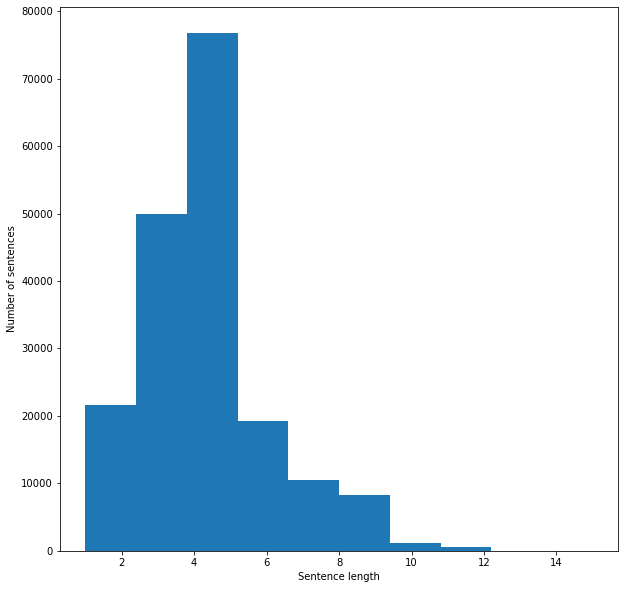

()

In [27]:
Token_analysis(df['tokenized_names'])

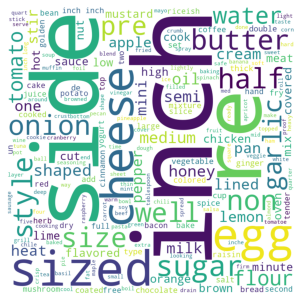

In [28]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(VOCAB)) 
plt.figure()
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [30]:
all_words.count()

TypeError: count() takes exactly one argument (0 given)

# Below is unneeded

In [10]:
tagged = nltk.pos_tag(tokens)
tagged

[('make', 'VB'),
 ('a', 'DT'),
 ('choice', 'NN'),
 ('and', 'CC'),
 ('proceed', 'NN'),
 ('with', 'IN'),
 ('recipe', 'JJ'),
 ('depending', 'VBG'),
 ('on', 'IN'),
 ('size', 'NN'),
 ('of', 'IN'),
 ('squash', 'NN'),
 ('cut', 'NN'),
 ('into', 'IN'),
 ('half', 'NN'),
 ('or', 'CC'),
 ('fourths', 'NNS'),
 ('remove', 'VB'),
 ('seeds', 'NNS'),
 ('for', 'IN'),
 ('spicy', 'NN'),
 ('squash', 'NN'),
 ('drizzle', 'NN'),
 ('olive', 'JJ'),
 ('oil', 'NN'),
 ('or', 'CC'),
 ('melted', 'VBN'),
 ('butter', 'NN'),
 ('over', 'IN'),
 ('each', 'DT'),
 ('cut', 'NN'),
 ('squash', 'NN'),
 ('piece', 'NN'),
 ('season', 'NN'),
 ('with', 'IN'),
 ('mexican', 'JJ'),
 ('seasoning', 'VBG'),
 ('mix', 'NN'),
 ('ii', 'NN'),
 ('for', 'IN'),
 ('sweet', 'JJ'),
 ('squash', 'JJ'),
 ('drizzle', 'NN'),
 ('melted', 'VBD'),
 ('honey', 'NN'),
 ('butter', 'NN'),
 ('grated', 'VBD'),
 ('piloncillo', 'RB'),
 ('over', 'IN'),
 ('each', 'DT'),
 ('cut', 'NN'),
 ('squash', 'NN'),
 ('piece', 'NN'),
 ('season', 'NN'),
 ('with', 'IN'),
 ('sweet', 

In [45]:
# entities = nltk.chunk.ne_chunk(tagged)
# entities

In [2]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# import re

In [9]:
# X = df.steps
# y = df.top_rating
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state= 16)

In [8]:
# X_train.shape

In [7]:
# vectorizer = TfidfVectorizer()
# vectors = vectorizer.fit_transform(X_train)
# feature_names = vectorizer.get_feature_names()
# dense = vectors.todense()
# denselist = dense.tolist()
# df = pd.DataFrame(denselist, columns=feature_names)

So I don't have the space to vectorize all of an entire training data set. So I should find a way to grab just a small section that covers what I hope is enough to find my key words for my data.

In [6]:
df_sample = df.sample(n=10000, random_state=16)

In [7]:
df_sample.top_rating.value_counts()

1    9040
0     960
Name: top_rating, dtype: int64

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords', quiet=True, raise_on_error=True)
stop_words = set(nltk.corpus.stopwords.words('english'))
tokenized_stop_words = nltk.word_tokenize(' '.join(nltk.corpus.stopwords.words('english')))

class Tokenizer(object):
    def __init__(self):
        nltk.download('punkt', quiet=True, raise_on_error=True)
        self.stemmer = nltk.stem.PorterStemmer()
        
    def _stem(self, token):
        if (token in stop_words):
            return token  # Solves error "UserWarning: Your stop_words may be inconsistent with your preprocessing."
        return self.stemmer.stem(token)
        
    def __call__(self, line):
        tokens = nltk.word_tokenize(line)
        tokens = (self._stem(token) for token in tokens)  # Stemming
        return list(tokens)
    
tokenizer = CountVectorizer(min_df=5,
                            max_features=1000,
                            ngram_range=(1, 2),
                            tokenizer=Tokenizer(),
                            stop_words=tokenized_stop_words,
                            lowercase=True)
# training_input = tokenizer.fit(training_corpus).transform(training_corpus)
# testing_input = tokenizer.transform(testing_corpus)

In [34]:
tokens = tokenizer.fit_transform(df_sample.steps)
feature_names = tokenizer.get_feature_names()
dense = tokens.todense()
denselist = dense.tolist()
df_words = pd.DataFrame(denselist, columns=feature_names)

In [35]:
df_words

!  &  ''  -  --  /  / 2  / 3  / 4  1  ...  wooden  worcestershir  \
0     3  0   1  0   1  0    0    0    0  0  ...       0              0   
1     0  0   0  0   0  0    0    0    0  0  ...       0              0   
2     0  0   0  0   0  0    0    0    0  0  ...       0              0   
3     1  0   0  0   0  0    0    0    0  0  ...       0              0   
4     0  0   1  0   1  0    0    0    0  0  ...       0              0   
...  .. ..  .. ..  .. ..  ...  ...  ... ..  ...     ...            ...   
9995  0  0   0  0   0  0    0    0    0  0  ...       0              0   
9996  0  0   0  0   0  0    0    0    0  0  ...       0              0   
9997  0  0   0  0   0  0    0    0    0  0  ...       0              0   
9998  0  0   0  0   0  0    0    0    0  0  ...       0              0   
9999  0  0   0  0   0  0    0    0    0  1  ...       0              0   

      worcestershir sauc  work  wrap  x  yogurt  yolk  zest  zucchini  
0                      0     0     0  0       0     0     0         3  
1                      0     0     0  0       0     0     0         0  
2                      0     0     0  0       0     0     0         0  
3                      0     0     0  0       0     1     0         0  
4                      0     0     0  0       0     0     0         0  
...                  ...   ...   ... ..     ...   ...   ...       ...  
9995                   0     0     0  0       0     0     0         0  
9996                   0     0     0  0       0     0     0         0  
9997                   0     0     0  0       0     0     0         0  
9998                   0     0     0  0       0     0     0         0  
9999                   0     0     0  0       0     0     0         0  

[10000 rows x 1000 columns]

In [10]:
# import spacy
# nlp = spacy.load('en_core_web_sm')

# # Define default stopwords list
# stoplist = spacy.lang.en.stop_words.STOP_WORDS

# def replace_ptbr_char_by_word(word):
#     word = str(word)
#     word = normalize('NFKD', word).encode('ASCII','ignore').decode('ASCII')
#     return word

# def remove_pt_br_char_by_text(text):
#     text = str(text)
#     text = " ".join(replace_ptbr_char_by_word(word) for word in text.split() if word not in stoplist)
#     return text

# df_sample['steps'] = df_sample['steps'].apply(remove_pt_br_char_by_text)

In [36]:
vectorizer = TfidfVectorizer(max_features=1000,min_df=0.2,max_df=0.8,token_pattern=r'\b[a-z]*\b')
vectors = vectorizer.fit_transform(df_sample.steps)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df_words = pd.DataFrame(denselist, columns=feature_names)

In [37]:
df_words

a     about       add       all        at      bake  baking  \
0     0.315453  0.000000  0.275717  0.000000  0.000000  0.000000     0.0   
1     0.125898  0.000000  0.000000  0.000000  0.000000  0.000000     0.0   
2     0.087213  0.166562  0.106719  0.000000  0.000000  0.000000     0.0   
3     0.112912  0.000000  0.552658  0.000000  0.000000  0.000000     0.0   
4     0.000000  0.000000  0.181436  0.147378  0.000000  0.000000     0.0   
...        ...       ...       ...       ...       ...       ...     ...   
9995  0.306838  0.195336  0.125154  0.000000  0.000000  0.000000     0.0   
9996  0.162079  0.000000  0.000000  0.000000  0.303353  0.136331     0.0   
9997  0.132202  0.000000  0.323539  0.000000  0.247435  0.000000     0.0   
9998  0.000000  0.000000  0.409682  0.000000  0.000000  0.000000     0.0   
9999  0.440985  0.000000  0.089935  0.000000  0.000000  0.000000     0.0   

          bowl    butter    cheese  ...     sugar       the      then  \
0     0.000000  0.000000  0.000000  ...  0.088595  0.204547  0.093202   
1     0.000000  0.706213  0.000000  ...  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000  ...  0.171456  0.296893  0.000000   
3     0.000000  0.211123  0.000000  ...  0.221978  0.000000  0.000000   
4     0.000000  0.000000  0.000000  ...  0.291499  0.336507  0.000000   
...        ...       ...       ...  ...       ...       ...       ...   
9995  0.000000  0.000000  0.000000  ...  0.603225  0.464242  0.000000   
9996  0.129986  0.000000  0.000000  ...  0.159319  0.459794  0.167604   
9997  0.000000  0.000000  0.533517  ...  0.000000  0.000000  0.000000   
9998  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
9999  0.235778  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

            to  together      top     until     water      well      with  
0     0.364132  0.000000  0.00000  0.049893  0.264950  0.000000  0.098432  
1     0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.274992  
2     0.528526  0.000000  0.00000  0.193114  0.000000  0.000000  0.095248  
3     0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  
4     0.149761  0.151027  0.00000  0.082080  0.000000  0.000000  0.161934  
...        ...       ...      ...       ...       ...       ...       ...  
9995  0.103305  0.000000  0.00000  0.000000  0.000000  0.000000  0.223403  
9996  0.000000  0.000000  0.00000  0.000000  0.158819  0.153843  0.177010  
9997  0.000000  0.000000  0.00000  0.146366  0.259086  0.000000  0.288762  
9998  0.169080  0.000000  0.00000  0.185336  0.000000  0.000000  0.000000  
9999  0.222704  0.000000  0.14226  0.162743  0.000000  0.000000  0.240805  

[10000 rows x 50 columns]

In [38]:
tokenized_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'you',
 "'re",
 'you',
 "'ve",
 'you',
 "'ll",
 'you',
 "'d",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'she',
 "'s",
 'her',
 'hers',
 'herself',
 'it',
 'it',
 "'s",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'that',
 "'ll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'ho

In [48]:
len(set(df_words.columns) - set(tokenized_stop_words))

33

In [11]:
# [col for col in df_words.columns if df_words.columns not in tokenized_stop_words]

I want to get rid of all the number variables, they will not give me accurate predictors I believe.

In [18]:
df.steps

0         make a choice and proceed with recipe  dependi...
1         preheat oven to 425 degrees f  press dough int...
2         brown ground beef in large pot  add chopped on...
3         place potatoes in a large pot of lightly salte...
4         mix all ingredients& boil for 2 1 / 2 hours   ...
                                ...                        
188154    heat oil in a 4-quart dutch oven  add celery  ...
188155              mix all ingredients together thoroughly
188156    in a bowl   combine the mashed yolks and mayon...
188157    place melted butter in a large mixing bowl and...
188158    whip sugar and shortening in a large bowl   ad...
Name: steps, Length: 188159, dtype: object

In [ ]:
for 

# Above here is all the old code, now here comes my successful code.

In [6]:
df.drop(columns='Unnamed: 0',inplace=True)
df

name      id  minutes  \
0         arriba   baked winter squash mexican style  137739       55   
1                   a bit different  breakfast pizza   31490       30   
2                          all in the kitchen  chili  112140      130   
3                                 alouette  potatoes   59389       45   
4                 amish  tomato ketchup  for canning   44061      190   
...                                              ...     ...      ...   
188154                                   zydeco soup  486161       60   
188155                              zydeco spice mix  493372        5   
188156                     zydeco ya ya deviled eggs  308080       40   
188157        cookies by design   cookies on a stick  298512       29   
188158  cookies by design   sugar shortbread cookies  298509       20   

        contributor_id   submitted  \
0                47892  2005-09-16   
1                26278  2002-06-17   
2               196586  2005-02-25   
3                68585  2003-04-14   
4                41706  2002-10-25   
...                ...         ...   
188154          227978  2012-08-29   
188155         1500678  2013-01-09   
188156           37779  2008-06-07   
188157          506822  2008-04-15   
188158          506822  2008-04-15   

                                                     tags  \
0       ["'60-minutes-or-less'", "'time-to-make'", "'c...   
1       ["'30-minutes-or-less'", "'time-to-make'", "'c...   
2       ["'time-to-make'", "'course'", "'preparation'"...   
3       ["'60-minutes-or-less'", "'time-to-make'", "'c...   
4       ["'weeknight'", "'time-to-make'", "'course'", ...   
...                                                   ...   
188154  ["'ham'", "'60-minutes-or-less'", "'time-to-ma...   
188155  ["'15-minutes-or-less'", "'time-to-make'", "'c...   
188156  ["'60-minutes-or-less'", "'time-to-make'", "'c...   
188157  ["'30-minutes-or-less'", "'time-to-make'", "'c...   
188158  ["'30-minutes-or-less'", "'time-to-make'", "'c...   

                                          nutrition  n_steps  \
0             [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1         [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2        [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3         [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4         [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   
...                                             ...      ...   
188154  [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]        7   
188155        [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]        1   
188156         [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7   
188157    [188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]        9   
188158     [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5   

                                                    steps  \
0       make a choice and proceed with recipe  dependi...   
1       preheat oven to 425 degrees f  press dough int...   
2       brown ground beef in large pot  add chopped on...   
3       place potatoes in a large pot of lightly salte...   
4       mix all ingredients& boil for 2 1 / 2 hours   ...   
...                                                   ...   
188154  heat oil in a 4-quart dutch oven  add celery  ...   
188155            mix all ingredients together thoroughly   
188156  in a bowl   combine the mashed yolks and mayon...   
188157  place melted butter in a large mixing bowl and...   
188158  whip sugar and shortening in a large bowl   ad...   

                                              description  \
0       autumn is my favorite time of year to cook! th...   
1       this recipe calls for the crust to be prebaked...   
2       this modified version of 'mom's' chili was a h...   
3       this is a super easy, great tasting, make ahea...   
4       my dh's amish mother raised him on this recipe...   
...                                                   ...   
188154  this is a delicious soup that i originally f

In [5]:
# Separating the dataframe into the high rating(1) and low rating(0)
df1 = df.loc[df['top_rating'] == 1]
df0 = df.loc[df['top_rating'] == 0]
# Taking a random sample of 8000 from each of high and low.
sample_1 = df1.sample(n=8000, random_state=16)
sample_0 = df0.sample(n=8000, random_state=16)
# Combining them together.
df_sample = sample_0.append(sample_1)
df_sample.reset_index(inplace=True)
df_sample

index  Unnamed: 0                                               name  \
0       40297       40298                             chocolate chia pudding   
1       57289       57290                         diabetic custard ice cream   
2      153933      153934  smoked salmon  cream cheese and cilantro stuff...   
3       45056       45057                                   coconut pancakes   
4       64604       64605                      emergency meatball sub dinner   
...       ...         ...                                                ...   
15995   94906       94907                      kerry simon s ultimate burger   
15996  175930      175931                           tropical breakfast shake   
15997  121142      121143                           orange pecan gem cookies   
15998  140076      140077                                red thai beef curry   
15999  178626      178627                              unstuffed pepper bake   

           id  minutes  contributor_id   submitted  \
0      458895        5          533844  2011-06-16   
1      210831       30           64918  2007-02-11   
2       70143       20           95743  2003-09-02   
3      436812        5         1677769  2010-09-07   
4       30818        8           31083  2002-06-10   
...       ...      ...             ...         ...   
15995  239635       45          527607  2007-07-10   
15996  175607      100          329251  2006-07-03   
15997  328364       23          455641  2008-10-01   
15998  259808      140          594139  2007-10-17   
15999  491229       40         1658850  2012-12-03   

                                                    tags  \
0      ["'15-minutes-or-less'", "'time-to-make'", "'c...   
1      ["'30-minutes-or-less'", "'time-to-make'", "'c...   
2      ["'30-minutes-or-less'", "'time-to-make'", "'c...   
3      ["'15-minutes-or-less'", "'time-to-make'", "'c...   
4      ["'15-minutes-or-less'", "'time-to-make'", "'c...   
...                                                  ...   
15995  ["'60-minutes-or-less'", "'time-to-make'", "'c...   
15996  ["'time-to-make'", "'course'", "'main-ingredie...   
15997  ["'30-minutes-or-less'", "'time-to-make'", "'c...   
15998  ["'curries'", "'time-to-make'", "'course'", "'...   
15999  ["'weeknight'", "'60-minutes-or-less'", "'time...   

                                          nutrition  n_steps  \
0          [143.2, 13.0, 27.0, 4.0, 13.0, 5.0, 3.0]        1   
1           [99.3, 8.0, 25.0, 3.0, 11.0, 13.0, 2.0]       11   
2             [68.4, 7.0, 1.0, 4.0, 9.0, 10.0, 0.0]        6   
3        [208.9, 21.0, 35.0, 12.0, 19.0, 33.0, 3.0]        4   
4        [148.1, 13.0, 22.0, 22.0, 13.0, 23.0, 3.0]        7   
...                                             ...      ...   
15995     [449.0, 54.0, 9.0, 12.0, 50.0, 61.0, 2.0]       10   
15996      [125.7, 0.0, 101.0, 1.0, 6.0, 0.0, 10.0]        5   
15997       [149.5, 13.0, 36.0, 5.0, 3.0, 7.0, 5.0]        9   
15998  [946.7, 117.0, 38.0, 13.0, 99.0, 196.0, 5.0]        7   
15999   [678.6, 56.0, 42.0, 54.0, 82.0, 93.0, 15.0]       10   

                                                   steps  \
0      whir all ingredients in a blender for a couple...   
1      stir eggs and sweetener into flour  set aside ...   
2      halve eggs lengthwise  combine egg yolks and a...   
3      mix all ingredients together  heat griddle and...   
4      heat frozen meatballs in a microwave oven   on...   
...                                                  ...   
15995  in a skillet   render the sliced bacon  remove...   
15996  toss banana with lemon juice  drain reserving ...   
15997  preheat oven to 350 degrees   and grease bakin...   
15998  heat half the oil in a large fry pan and cook ...   
15999  preheat oven to 375 degrees  saute ground beef...   

                                             description  \
0      sugar-free version of ruth's hemp foods recipe...   
1      i love custard and this is pretty good.  again...   
2      

## Playing with Bag of Words

In [6]:
X = df_sample[['name','tags','description','ingredients','steps']]
y = df_sample.top_rating

In [15]:
# Train Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [17]:
count_vectorizer = CountVectorizer(analyzer='word', token_pattern='\w+')
bow = dict()
bow['train'] = (count_vectorizer.fit_transform(X_train), y_train)
bow['test'] = (count_vectorizer.transform(X_test), y_test)

In [18]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w+')

In [19]:
tfidf = dict()
tfidf['train'] = (tfidf_vectorizer.fit_transform(X_train), y_train)
tfidf['test'] = (tfidf_vectorizer.transform(X_test), y_test)

In [21]:
import keras
import gensim

In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

## Playing with Bag of Words

In [16]:
# marking the wanted X variables and y target.
X, y = df_sample.description, df_sample.top_rating
# defining the empty list for the lemmatized documents.
documents = []

# Initialising the Lemmatizer.
stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)
documents

['sugar free version of ruth hemp food recipe my husband like to use a dip for apple slice process the chia seed first in my coffee grinder it give the pudding smoother texture',
 'i love custard and this is pretty good again it been adapted to make sure there no additive or modified food starch in it',
 'these are scrumptious different and salmon colored oh and addictive the filling also make great spread for cracker or dip for vegetable it my version of recipe from gourmet 1995',
 'grain free pancake',
 'this isn a recipe a much a it is solution to m starving what for dinner when you walk in the door',
 'i on spinach feta craze right now m not fond of most phyllo dough but loooove pizza dough like calzones that don have ricotta how to satisfy all three this concoction that wa lot of fun to make feel free to use another pizza dough recipe or tube bag of storebought dough you need something that yield about one 12 pizza some greek seasoning owuld also probably work great in this can wi

In [17]:
# Initialising both the Vectorizer and tfidf converter.
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
tfidfconverter = TfidfTransformer()
# Converting documents to vectors.
X = vectorizer.fit_transform(documents).toarray()
# Selecting key vectors (words)
X = tfidfconverter.fit_transform(X).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
# Train Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [19]:
# Initialise the RFC
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
# Fit the Training Data
classifier.fit(X_train, y_train) 
# Preparing prediction of test data
y_pred=classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5440625


Going to set this up as a function.

In [52]:
def predict_accuracy(X, y):
    # defining the empty list for the lemmatized documents.
    documents = []

    # Initialising the Lemmatizer.
    stemmer = WordNetLemmatizer()

    for sen in range(0, len(X)):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(X[sen]))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        document = document.split()

        document = [stemmer.lemmatize(word) for word in document]
        document = ' '.join(document)

        documents.append(document)
        
#     # Initialising both the Vectorizer and tfidf converter.
#     vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
#     tfidfconverter = TfidfVectorizer(max_features=2000, max_df=0.6)
#     # Converting documents to vectors.
#     X = tfidfconverter.fit_transform(documents).toarray()
#     feature_names = tfidfconverter.get_feature_names()
#     denselist = X.todense().tolist()
# #     denselist = dense.tolist()
#     df_words = pd.DataFrame(denselist, columns=feature_names)
    
    # Train Test Splitting
    X_train, X_test, y_train, y_test = train_test_split(documents, y, test_size=0.2, random_state=16)
    
    vectorizer = TfidfVectorizer(max_features=2000,max_df=0.6,token_pattern=r'\b[a-z]*\b')
    vectors = vectorizer.fit_transform(X_train)
    feature_names = vectorizer.get_feature_names()
    dense = vectors.todense()
    denselist = dense.tolist()
    df_words = pd.DataFrame(denselist, columns=feature_names)
    
    lrcv = LogisticRegressionCV(penalty='l1', cv=10, solver='liblinear')
    lrcv.fit(vectors, y_train)
    
    coeffs = pd.DataFrame(lrcv.coef_, columns=df_words.columns)
    coeffs_t = coeffs.transpose()
    coeffs_t.columns = ['lasso_coefs']
    coeffs_abs = coeffs_t.abs().sort_values('lasso_coefs', ascending=False)
    new = coeffs_abs[coeffs_abs > 0]
    new.dropna(inplace=True)
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(new.index)) 
    plt.figure()
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
    
    return(X_train, X_test, y_train, y_test)
#     # Initialise the RFC
#     classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
#     # Fit the Training Data
#     classifier.fit(X_train, y_train) 
#     # Preparing prediction of test data
#     y_pred=classifier.predict(X_test)

#     return("Accuracy:",metrics.accuracy_score(y_test, y_pred))

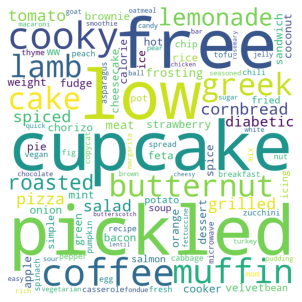

(['onion roast',
  'pineapple mango tango scallop skewer',
  'chili spiced bean salad',
  'iced mint tea',
  'skordalia potato and garlic dip',
  'extra cheese muffin',
  'whole wheat penne sausage',
  'jessica turkish spinach and lentil soup',
  'quick cheese craving buster',
  'vegetarian herb medley',
  'thai lemongrass tofu skewer',
  'willy s chocolate truth cake',
  'dirty shirley',
  'cheddar cheese popover',
  'miso soup with enoki mushroom',
  'easy apple pudding',
  'southern iced tea',
  'spinach artichoke quiche',
  'healthier oatmeal cooky with cake mix',
  'sherry whoopie pie',
  'chicken tao',
  'bier suppe beer soup',
  'herbed pizza bread',
  'weight watcher banana oat muffin',
  'pommes de terre au lait',
  'lemon roasted beet',
  'easy cheesy chicken breast',
  'sausage pepper and potato',
  'almond biscotti quaresimale',
  'chicken breast smothered in tomato and mozzarella',
  'chocolate covered african cherry martini',
  'cauliflower broccoli salad',
  'chicken kab

In [53]:
predict_accuracy(df_sample.name, df_sample.top_rating)

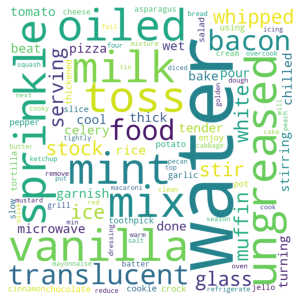

(['place beef roast on large sheet of foil sprinkle 1 package of liptons onion soup mix over the meat sprinkle roast with dash of garlic powder seal foil place in large pan and bake for 3 hour at 300f or until tender',
  'pre heat grill to medium high and place grate at least 4 inch above fire in food processor combine 1 mango 1 pineapple sesame oil lime juice and zest and lemon pepper process until smooth and set aside in small bowl combine lemon juice and sugar in large bowl and stir until dissolved add scallop and toss to coat cover and refrigerate for at least 15 minute thread four scallop per skewer with the remaining mango pineapple and pepper alternating evenly grill about four minute on each side until scallop turn opaque and have bit of char to them transfer to platter or individual plate and drizzle with sauce',
  'combine all salad ingredient together except for the lettuce make dressing by combining all the ingredient in small bowl and stirring well pour dressing over salad

In [54]:
predict_accuracy(df_sample.steps, df_sample.top_rating)

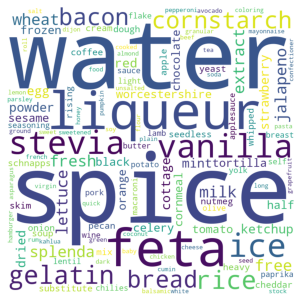

(['rump steak garlic powder dry onion soup mix',
  'sea scallop mango fresh pineapple sesame oil anjou pear lemon pepper seasoning fresh lemon juice sugar red pepper',
  'red kidney bean pinto bean chickpea whole kernel corn celery green onion parsley diced green chilies lettuce leaf salad oil wine vinegar garlic clove salt chili powder dried oregano ground cumin pepper',
  'water mint leaf green tea leaf lemon juice honey',
  'floury potato garlic clove lemon juice ground almond extra virgin olive oil egg sea salt fresh ground black pepper',
  'all purpose flour sugar baking soda salt sharp cheddar cheese milk egg butter',
  'whole wheat penne polska kielbasa olive oil garlic onion red bell pepper dried basil pepper diced tomato artificial sweetener parmesan cheese',
  'dried lentil water salt olive oil onion garlic clove cayenne pepper bay leaf ground cumin ground coriander whole tomato hot chili powder frozen leaf spinach salt pepper bacon sour cream',
  'corn thins cheddar cheese d

In [55]:
predict_accuracy(df_sample.ingredients, df_sample.top_rating)

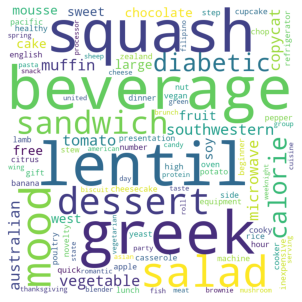

(['time to make main ingredient preparation 5 ingredient or le very low carbs beef easy dietary high protein low carb high in something low in something meat roast beef 3 step or le 4 hour or le',
  '60 minute or le time to make course main ingredient cuisine preparation north american south west pacific main dish fruit seafood american asian barbecue hawaiian dietary scallop tropical fruit mango pineapple shellfish equipment grilling presentation served hot technique',
  '30 minute or le time to make course main ingredient cuisine preparation occasion north american salad side dish bean vegetable american mexican southwestern united state tex mex easy no cook refrigerator beginner cook potluck picnic summer vegan vegetarian dietary seasonal brown bag inexpensive free of something corn pepper to go equipment presentation served cold technique',
  '60 minute or le time to make course preparation beverage easy vegetarian dietary 3 step or le',
  'lactose 60 minute or le time to make cour

In [56]:
predict_accuracy(df_sample.tags, df_sample.top_rating)

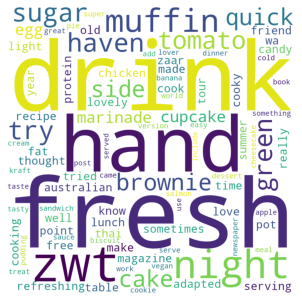

(['this is very good and it doesn call for many ingredient',
  'this grand prize winner of robert mondavi 3rd annual art of the skewer recipe contest wa created by pat neaves the cook time includes the 15 minute for marinating',
  'from sunset vegetarian cooking cookbook please add at least four hour for chilling',
  'a summer favourite when your garden is overgrown with mint easy to make and delicious cook time is cooling time original recipe from homemaker magazine had 1 4 cup lime juice but after acadia review adjusted it a agree that is too much and is overwhelming think that lemon juice compliment the taste more a well for vegan version use agave nectar',
  'described in theodore kyriakou and charles campion real greek food a simple but satisfyingly pungent greek super aioli which go well a relish with rich food this dish is also extremely popular a one of several mezze plate ve included the optional ground almond in this recipe which according to kyriakou and campion is how they 

In [57]:
predict_accuracy(df_sample.description, df_sample.top_rating)

# Do a COUNT of all the WORDS used throughout the: STEPS, DESCRIPTION, NAME, INGREDIENTS

This might reveal more trends for positive words and negative words.

In [21]:
df

name      id  minutes  \
0         arriba   baked winter squash mexican style  137739       55   
1                   a bit different  breakfast pizza   31490       30   
2                          all in the kitchen  chili  112140      130   
3                                 alouette  potatoes   59389       45   
4                 amish  tomato ketchup  for canning   44061      190   
...                                              ...     ...      ...   
188154                                   zydeco soup  486161       60   
188155                              zydeco spice mix  493372        5   
188156                     zydeco ya ya deviled eggs  308080       40   
188157        cookies by design   cookies on a stick  298512       29   
188158  cookies by design   sugar shortbread cookies  298509       20   

        contributor_id   submitted  \
0                47892  2005-09-16   
1                26278  2002-06-17   
2               196586  2005-02-25   
3                68585  2003-04-14   
4                41706  2002-10-25   
...                ...         ...   
188154          227978  2012-08-29   
188155         1500678  2013-01-09   
188156           37779  2008-06-07   
188157          506822  2008-04-15   
188158          506822  2008-04-15   

                                                     tags  \
0       ["'60-minutes-or-less'", "'time-to-make'", "'c...   
1       ["'30-minutes-or-less'", "'time-to-make'", "'c...   
2       ["'time-to-make'", "'course'", "'preparation'"...   
3       ["'60-minutes-or-less'", "'time-to-make'", "'c...   
4       ["'weeknight'", "'time-to-make'", "'course'", ...   
...                                                   ...   
188154  ["'ham'", "'60-minutes-or-less'", "'time-to-ma...   
188155  ["'15-minutes-or-less'", "'time-to-make'", "'c...   
188156  ["'60-minutes-or-less'", "'time-to-make'", "'c...   
188157  ["'30-minutes-or-less'", "'time-to-make'", "'c...   
188158  ["'30-minutes-or-less'", "'time-to-make'", "'c...   

                                          nutrition  n_steps  \
0             [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1         [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2        [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3         [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4         [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   
...                                             ...      ...   
188154  [415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]        7   
188155        [14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]        1   
188156         [59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]        7   
188157    [188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]        9   
188158     [174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]        5   

                                                    steps  \
0       make a choice and proceed with recipe  dependi...   
1       preheat oven to 425 degrees f  press dough int...   
2       brown ground beef in large pot  add chopped on...   
3       place potatoes in a large pot of lightly salte...   
4       mix all ingredients& boil for 2 1 / 2 hours   ...   
...                                                   ...   
188154  heat oil in a 4-quart dutch oven  add celery  ...   
188155            mix all ingredients together thoroughly   
188156  in a bowl   combine the mashed yolks and mayon...   
188157  place melted butter in a large mixing bowl and...   
188158  whip sugar and shortening in a large bowl   ad...   

                                              description  \
0       autumn is my favorite time of year to cook! th...   
1       this recipe calls for the crust to be prebaked...   
2       this modified version of 'mom's' chili was a h...   
3       this is a super easy, great tasting, make ahea...   
4       my dh's amish mother raised him on this recipe...   
...                                                   ...   
188154  this is a delicious soup that i originally f

In [22]:
tokens = tokenizer.fit_transform(df_sample.steps)
feature_names = tokenizer.get_feature_names()
dense = tokens.todense()
denselist = dense.tolist()
df_words = pd.DataFrame(denselist, columns=feature_names)

NameError: name 'tokenizer' is not defined

In [37]:
# marking the wanted X variables and y target.
X, y = df_sample.description, df_sample.top_rating
# defining the empty list for the lemmatized documents.
documents = []

# Initialising the Lemmatizer.
stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)
documents

['sugar free version of ruth hemp food recipe my husband like to use a dip for apple slice process the chia seed first in my coffee grinder it give the pudding smoother texture',
 'i love custard and this is pretty good again it been adapted to make sure there no additive or modified food starch in it',
 'these are scrumptious different and salmon colored oh and addictive the filling also make great spread for cracker or dip for vegetable it my version of recipe from gourmet 1995',
 'grain free pancake',
 'this isn a recipe a much a it is solution to m starving what for dinner when you walk in the door',
 'i on spinach feta craze right now m not fond of most phyllo dough but loooove pizza dough like calzones that don have ricotta how to satisfy all three this concoction that wa lot of fun to make feel free to use another pizza dough recipe or tube bag of storebought dough you need something that yield about one 12 pizza some greek seasoning owuld also probably work great in this can wi

In [44]:
X_train, X_test, y_train, y_test = train_test_split(documents, y, train_size=0.8, stratify=y, random_state= 16)

In [45]:
vectorizer = TfidfVectorizer(max_features=2000,max_df=0.6,token_pattern=r'\b[a-z]*\b')
vectors = vectorizer.fit_transform(X_train)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df_words = pd.DataFrame(denselist, columns=feature_names)

In [46]:
lrcv = LogisticRegressionCV(penalty='l1', cv=10, solver='liblinear')
lrcv.fit(vectors, y_train)

LogisticRegressionCV(cv=10, penalty='l1', solver='liblinear')

In [41]:
lrcv.coef_


array([[0.02785313, 0.        , 0.        , ..., 0.        , 0.        ,
        1.07813702]])

In [47]:
coeffs = pd.DataFrame(lrcv.coef_, columns=df_words.columns)
coeffs_t = coeffs.transpose()
coeffs_t.columns = ['lasso_coefs']
coeffs_abs = coeffs_t.abs().sort_values('lasso_coefs', ascending=False)

In [48]:
new = coeffs_abs[coeffs_abs > 0]
new.dropna(inplace=True)

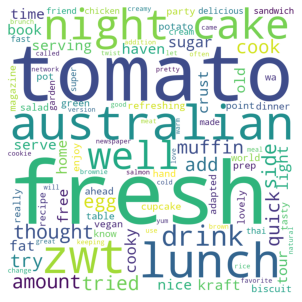

In [49]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(new.index)) 
plt.figure()
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [7]:
# marking the wanted X variables and y target.
X, y = df_sample.description, df_sample.top_rating
# defining the empty list for the lemmatized documents.
documents = []

# Initialising the Lemmatizer.
stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)
documents

['sugar free version of ruth hemp food recipe my husband like to use a dip for apple slice process the chia seed first in my coffee grinder it give the pudding smoother texture',
 'i love custard and this is pretty good again it been adapted to make sure there no additive or modified food starch in it',
 'these are scrumptious different and salmon colored oh and addictive the filling also make great spread for cracker or dip for vegetable it my version of recipe from gourmet 1995',
 'grain free pancake',
 'this isn a recipe a much a it is solution to m starving what for dinner when you walk in the door',
 'i on spinach feta craze right now m not fond of most phyllo dough but loooove pizza dough like calzones that don have ricotta how to satisfy all three this concoction that wa lot of fun to make feel free to use another pizza dough recipe or tube bag of storebought dough you need something that yield about one 12 pizza some greek seasoning owuld also probably work great in this can wi

In [8]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [32]:
documents[0]

'sugar free version of ruth hemp food recipe my husband like to use a dip for apple slice process the chia seed first in my coffee grinder it give the pudding smoother texture'

In [9]:
count = dict()
full_count = dict()
for string in documents:
    count = word_count(string)
    full_count.update(count)

In [16]:
full_count

{'sugar': 1,
 'free': 1,
 'version': 2,
 'of': 1,
 'ruth': 1,
 'hemp': 1,
 'food': 1,
 'recipe': 2,
 'my': 1,
 'husband': 1,
 'like': 1,
 'to': 3,
 'use': 1,
 'a': 1,
 'dip': 1,
 'for': 1,
 'apple': 2,
 'slice': 2,
 'process': 1,
 'the': 2,
 'chia': 1,
 'seed': 1,
 'first': 1,
 'in': 1,
 'coffee': 1,
 'grinder': 1,
 'it': 2,
 'give': 1,
 'pudding': 2,
 'smoother': 1,
 'texture': 1,
 'i': 1,
 'love': 1,
 'custard': 1,
 'and': 1,
 'this': 1,
 'is': 3,
 'pretty': 1,
 'good': 1,
 'again': 1,
 'been': 1,
 'adapted': 1,
 'make': 3,
 'sure': 1,
 'there': 1,
 'no': 2,
 'additive': 1,
 'or': 1,
 'modified': 1,
 'starch': 1,
 'these': 1,
 'are': 2,
 'scrumptious': 1,
 'different': 1,
 'salmon': 2,
 'colored': 1,
 'oh': 1,
 'addictive': 1,
 'filling': 1,
 'also': 1,
 'great': 1,
 'spread': 1,
 'cracker': 1,
 'vegetable': 1,
 'from': 1,
 'gourmet': 1,
 '1995': 1,
 'grain': 1,
 'pancake': 2,
 'isn': 1,
 'much': 1,
 'solution': 1,
 'm': 2,
 'starving': 1,
 'what': 1,
 'dinner': 1,
 'when': 1,
 'you'

In [22]:
count_df = pd.DataFrame(data = full_count, index=[0])

Index(['sugar', 'free', 'version', 'of', 'ruth', 'hemp', 'food', 'recipe',
       'my', 'husband',
       ...
       'qute', '141965', 'hahaha', 'attract', 'sprang', 'wandered', 'pizzazz',
       'cora', 'hadnt', 'touched'],
      dtype='object', length=16327)

In [42]:
# marking the wanted X variables and y target.
X = df_sample.ingredients
# defining the empty list for the lemmatized documents.
documents = []

# Initialising the Lemmatizer.
stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)
documents

['chia seed 1 low fat milk almond butter cocoa splenda sugar substitute vanilla salt',
 'liquid stevia tapioca flour egg whole milk vanilla extract',
 'hard boiled egg smoked salmon cream cheese sour cream lemon juice salt and pepper fresh cilantro cilantro leaf',
 'egg olive oil vanilla cinnamon baking soda maple syrup coconut flake',
 'frozen meatball pasta sauce cheese submarine roll',
 'pizza dough fresh spinach feta cheese olive oil garlic clove oregano ground black pepper paprika nutmeg',
 'green cabbage head red cabbage head red bell pepper celery carrot onion sugar apple cider vinegar vegetable oil kosher salt',
 'boneless skinless chicken breast baby spinach goat cheese onion fresh basil bacon bit olive oil italian seasoned breadcrumb parmesan cheese salt and pepper egg',
 'almond meal sugar salt unsalted butter',
 'cake mix oil egg frosting candy',
 'cauliflower salt freshly ground black pepper garlic olive oil penne breadcrumb',
 'chicken thigh dill pickle pickle juice egg h

In [55]:
for x in range(0,len(documents)):
    documents[x]=documents[x].split()
documents[0]
# documents[0].split()

['chia',
 'seed',
 '1',
 'low',
 'fat',
 'milk',
 'almond',
 'butter',
 'cocoa',
 'splenda',
 'sugar',
 'substitute',
 'vanilla',
 'salt']

In [56]:
len(documents)

16000

In [58]:
documents[15999]

['ground',
 'beef',
 'onion',
 'red',
 'bell',
 'pepper',
 'garlic',
 'clove',
 'salt',
 'ground',
 'black',
 'pepper',
 'diced',
 'tomato',
 'instant',
 'rice',
 'worcestershire',
 'sauce',
 'italian',
 'seasoning',
 'sharp',
 'cheddar',
 'cheese',
 'tomato',
 'sauce']

In [59]:
full_ingredients_list = []
for ingredient_list in documents:
    for ingredient in ingredient_list:
        if ingredient in full_ingredients_list:
            pass
        else:
            full_ingredients_list.append(ingredient)
full_ingredients_list

['chia',
 'seed',
 '1',
 'low',
 'fat',
 'milk',
 'almond',
 'butter',
 'cocoa',
 'splenda',
 'sugar',
 'substitute',
 'vanilla',
 'salt',
 'liquid',
 'stevia',
 'tapioca',
 'flour',
 'egg',
 'whole',
 'extract',
 'hard',
 'boiled',
 'smoked',
 'salmon',
 'cream',
 'cheese',
 'sour',
 'lemon',
 'juice',
 'and',
 'pepper',
 'fresh',
 'cilantro',
 'leaf',
 'olive',
 'oil',
 'cinnamon',
 'baking',
 'soda',
 'maple',
 'syrup',
 'coconut',
 'flake',
 'frozen',
 'meatball',
 'pasta',
 'sauce',
 'submarine',
 'roll',
 'pizza',
 'dough',
 'spinach',
 'feta',
 'garlic',
 'clove',
 'oregano',
 'ground',
 'black',
 'paprika',
 'nutmeg',
 'green',
 'cabbage',
 'head',
 'red',
 'bell',
 'celery',
 'carrot',
 'onion',
 'apple',
 'cider',
 'vinegar',
 'vegetable',
 'kosher',
 'boneless',
 'skinless',
 'chicken',
 'breast',
 'baby',
 'goat',
 'basil',
 'bacon',
 'bit',
 'italian',
 'seasoned',
 'breadcrumb',
 'parmesan',
 'meal',
 'unsalted',
 'cake',
 'mix',
 'frosting',
 'candy',
 'cauliflower',
 'f

In [ ]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [ ]:
count = dict()
full_count = dict()
for string in documents:
    count = word_count(string)
    full_count.update(count)